# Projet 2 - Youtube --Fred--

### Import des modules

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import des données

##### Data

In [171]:
data_fr = pd.read_csv("data/modif_FRvideos.csv")

/home/fred/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [172]:
data_fr.dtypes

video_id                   object
trending_date              object
title                      object
channel_title              object
category_id               float64
publish_time               object
tags                       object
views                     float64
likes                     float64
dislikes                  float64
comment_count             float64
thumbnail_link             object
comments_disabled          object
ratings_disabled           object
video_error_or_removed     object
description                object
category                   object
engagement                float64
duree                     float64
dtype: object

In [173]:
print(data_fr.shape)
data_fr.head(2)

(40854, 19)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,engagement,duree
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24.0,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702.0,29282.0,1108.0,3817.0,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,Entertainment,0.077777,NaN
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24.0,2017-11-12T15:00:02.000Z,[none],432721.0,14053.0,576.0,1161.0,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,Entertainment,0.029909,3541.0


## Graphs par catégories

#### Nouveau DataFrame allégé

In [174]:
df = data_fr[["title", "category", "duree", "engagement", "views", "likes", "dislikes", "comment_count"]]

In [175]:
df.tail(2)

,title,category,duree,engagement,views,likes,dislikes,comment_count
40852,"Նռան հատիկ, Սերիա 192 / Pomegranate seed / Nra...",Film & Animation,2257.0,0.003712,78117.0,244.0,74.0,46.0
40853,Mandoumbé ak Koor Gui 2018 Episode 28,Entertainment,454.0,0.023045,46604.0,947.0,37.0,127.0


### Reduction du jeu de donnéés

##### 200 entrées

In [176]:
#df = df.iloc[0:200, :]

In [177]:
df.shape

(40854, 8)

### Views / Catégories

In [178]:
df.category.unique()

array(['Entertainment', 'Comedy', 'Gaming', 'Sports', 'People & Blogs',
       'Education', 'Howto & Style', 'Science & Technology',
       'Autos & Vehicles', 'News & Politics', 'Film & Animation', 'Music',
       'Shows', 'Travel & Events', 'Pets & Animals', nan, 'Movies',
       'Trailers'], dtype=object)

In [179]:
df.shape

(40854, 8)

In [180]:
df = df[~df["category"].isnull()]

In [181]:
df.shape

(40593, 8)

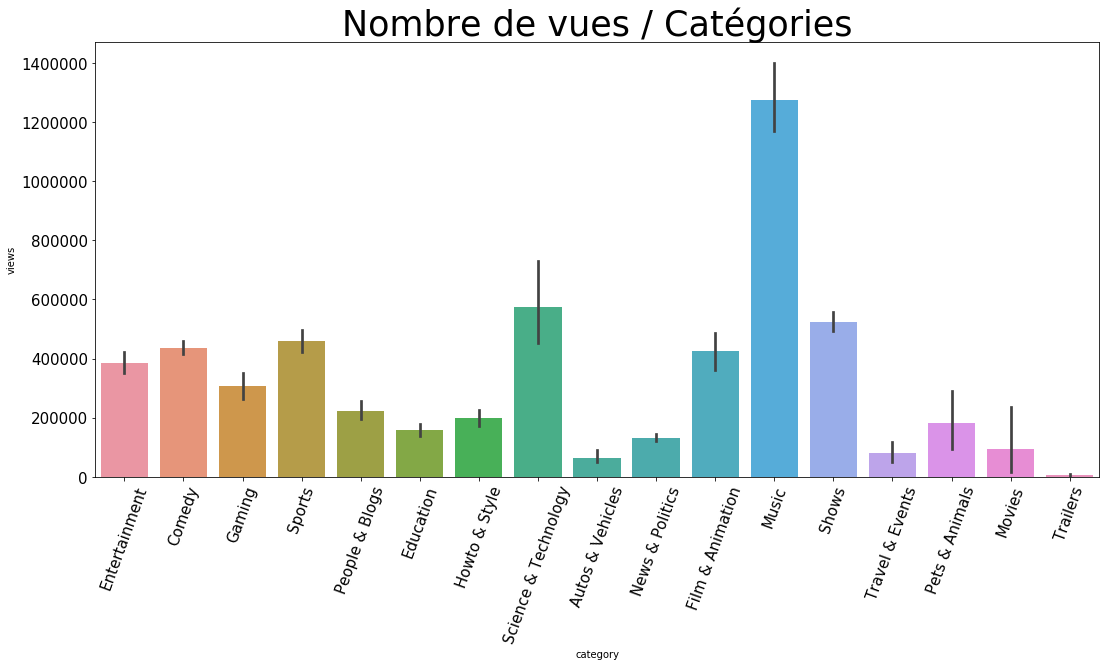

In [35]:
plt.figure(figsize=(18,8))

sns.barplot(data=df, x="category", y="views")
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de vues / Catégories", size=35)

plt.show()

In [204]:
df.shape

(31121, 19)

In [203]:
df = df[~df["duree"].isnull()]
df = df[~df["category"].isnull()]

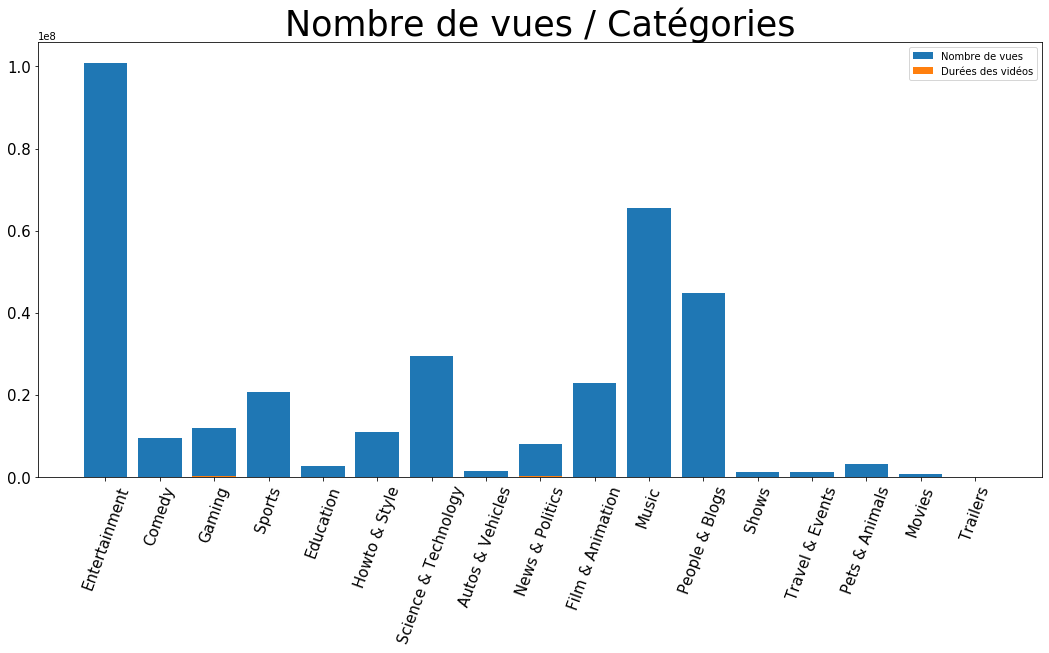

In [205]:
plt.figure(figsize=(18,8))

plt.bar(df["category"], df["views"], label="Nombre de vues")
plt.bar(df["category"], df["duree"], label="Durées des vidéos")

plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de vues / Catégories", size=35)
plt.legend()

plt.show()

### Likes / Catégories

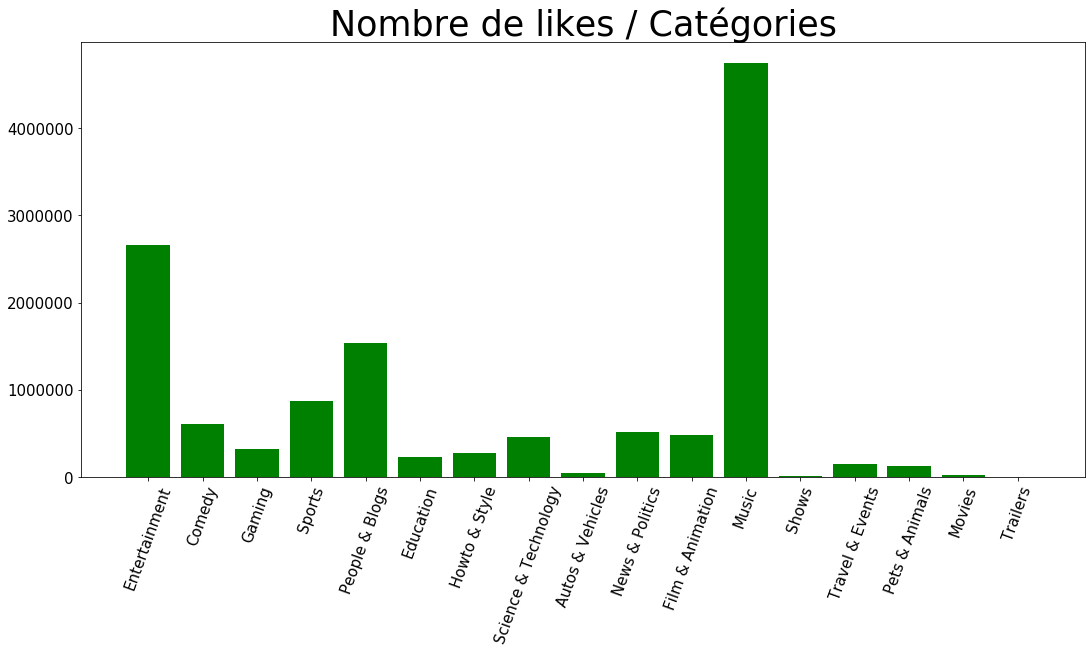

In [15]:
plt.figure(figsize=(18,8))

plt.bar(df["category"], df["likes"], color="g")
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de likes / Catégories", size=35)

plt.show()

### Dislikes / Catégories

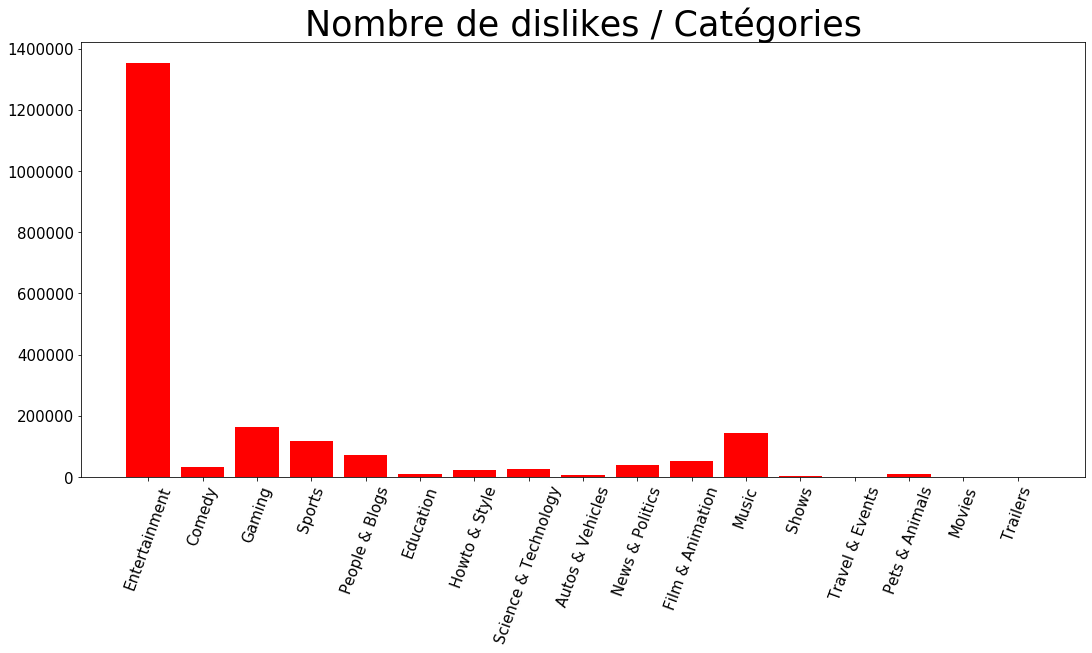

In [16]:
plt.figure(figsize=(18,8))

plt.bar(df["category"], df["dislikes"], color="r")
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de dislikes / Catégories", size=35)

plt.show()

### Comments / Catégories

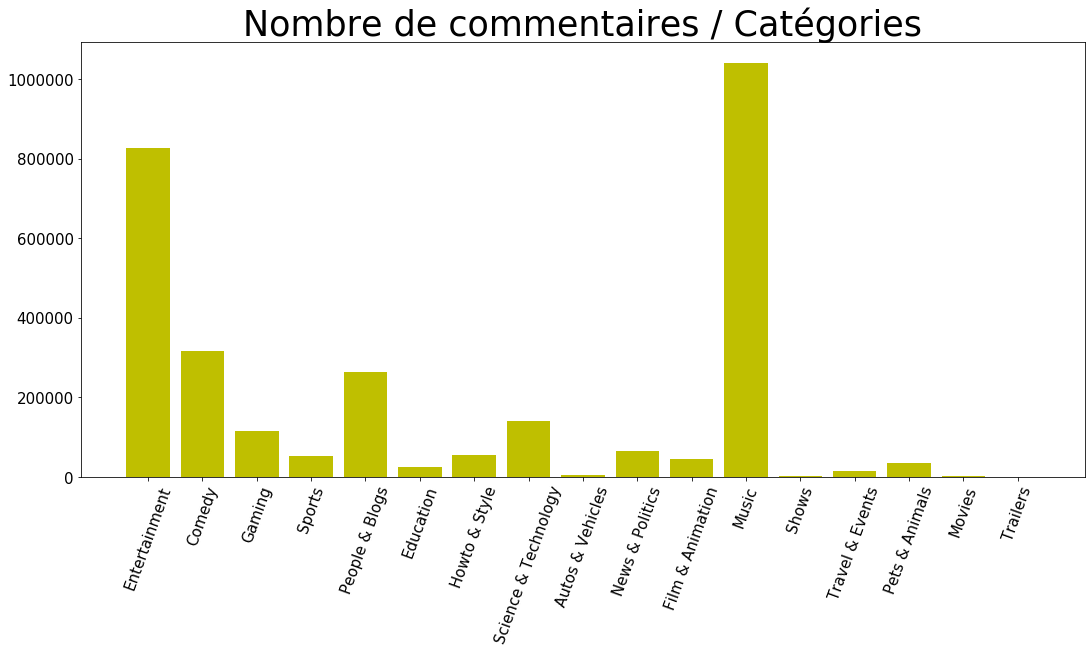

In [17]:
plt.figure(figsize=(18,8))

plt.bar(df["category"], df["comment_count"], color="y")
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Nombre de commentaires / Catégories", size=35)

plt.show()

### Groupé

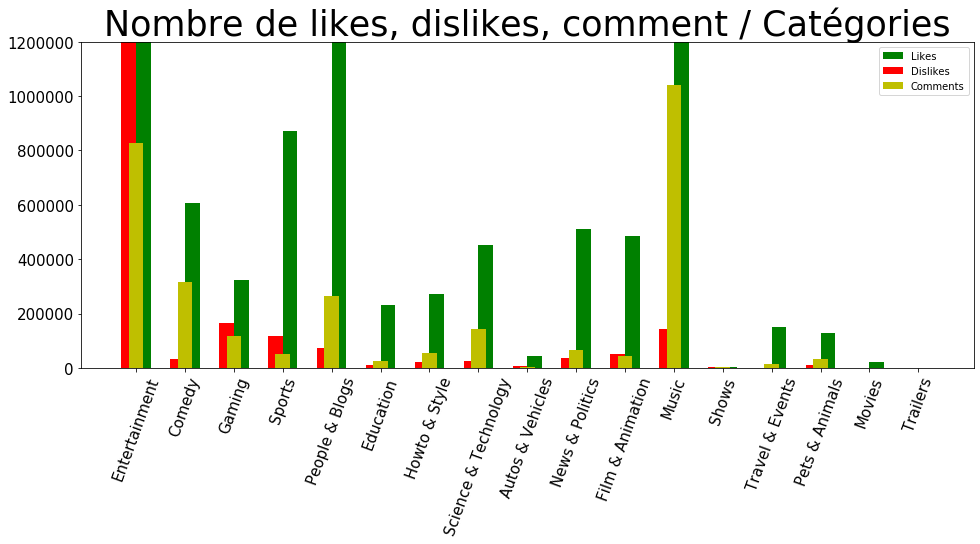

In [18]:
plt.figure(figsize=(16,6))

#plt.bar(df["category"], df["views"])
plt.bar(df["category"], df["likes"],label="Likes", width=0.3, align="edge", color="g")
plt.bar(df["category"], df["dislikes"],label="Dislikes", width=-0.3, align="edge", color="r")
plt.bar(df["category"], df["comment_count"],label="Comments", width=0.3, align="center", color="y")


plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.ylim(0,1200000)

plt.title("Nombre de likes, dislikes, comment / Catégories", size=35)
plt.legend(loc="best", bbox_to_anchor=(1,1))

plt.show()

## Travail sur les mots-clés

### DataFrame allégé

In [182]:
df = data_fr.copy()
#df = df[0:200]
df.shape

(40854, 19)

In [183]:
df = df[~df["tags"].isnull()]

#### Création d'un dictionnaire de mots-cles

In [184]:
tags = df["tags"].values

In [185]:
def supprime_accent(ligne):
        """ supprime les accents du texte source """
        accent = ['é', 'è', 'ê', 'à', 'ù', 'û', 'ç', 'ô', 'î', 'ï', 'â']
        sans_accent = ['e', 'e', 'e', 'a', 'u', 'u', 'c', 'o', 'i', 'i', 'a']
        i = 0
        while i < len(accent):
            ligne = ligne.replace(accent[i], sans_accent[i])
            i += 1
        return ligne

In [186]:
tags[0:1]

array(['Raptor"|"Dissident"|"Expliquez"|"moi"|"cette"|"merde'],
      dtype=object)

In [187]:
liste_tags = []
for y in tags:
    y = y.lower()
    result = supprime_accent(y)
    result = result.split('"|"')
    liste_tags.append(result)

In [188]:
dico_tags = {}
for x in liste_tags:
    for x in x:
        if x in dico_tags.keys():
            dico_tags[x] += 1
        else:
            dico_tags[x] = 1

In [189]:
len(dico_tags.keys())

125790

#### Classement du dico

In [190]:
dico_tags_sorted = sorted(dico_tags.items(),key=lambda c:c[1], reverse=True)
dico_tags_sorted

[('[none]', 5304),
 ('humour', 2279),
 ('football', 1433),
 ('2018', 1433),
 ('france', 1374),
 ('video', 1104),
 ('rap', 969),
 ('drole', 888),
 ('tv', 819),
 ('francais', 812),
 ('serie', 761),
 ('paris', 736),
 ('live', 728),
 ('divertissement', 681),
 ('freestyle', 672),
 ('musique', 669),
 ('foot', 650),
 ('2017', 626),
 ('interview', 602),
 ('funny', 589),
 ('senegal', 559),
 ('sketch', 555),
 ('film', 553),
 ('music', 549),
 ('psg', 531),
 ('comedy', 519),
 ('sport', 514),
 ('fr', 511),
 ('maroc', 502),
 ('amour', 500),
 ('johnny hallyday', 499),
 ('top 10', 491),
 ('television', 482),
 ('vlog', 468),
 ('politique', 465),
 ('tuto', 453),
 ('youtube', 450),
 ('news', 449),
 ('replay', 446),
 ('comedie', 444),
 ('highlights', 434),
 ('neymar', 430),
 ('rire', 427),
 ('clip', 420),
 ('theatre', 420),
 ('cinema', 417),
 ('top', 417),
 ('fun', 416),
 ('prank', 415),
 ('zap', 411),
 ('tpmp', 405),
 ('booba', 404),
 ('diy', 387),
 ('macron', 387),
 ('ronaldo', 368),
 ('de', 363),
 ('cl

##### Top 50 des tags

In [191]:
top_tags = []
for x, y in dico_tags_sorted[1:21]:
    top_tags.append(x)
top_tags

['humour',
 'football',
 '2018',
 'france',
 'video',
 'rap',
 'drole',
 'tv',
 'francais',
 'serie',
 'paris',
 'live',
 'divertissement',
 'freestyle',
 'musique',
 'foot',
 '2017',
 'interview',
 'funny',
 'senegal']

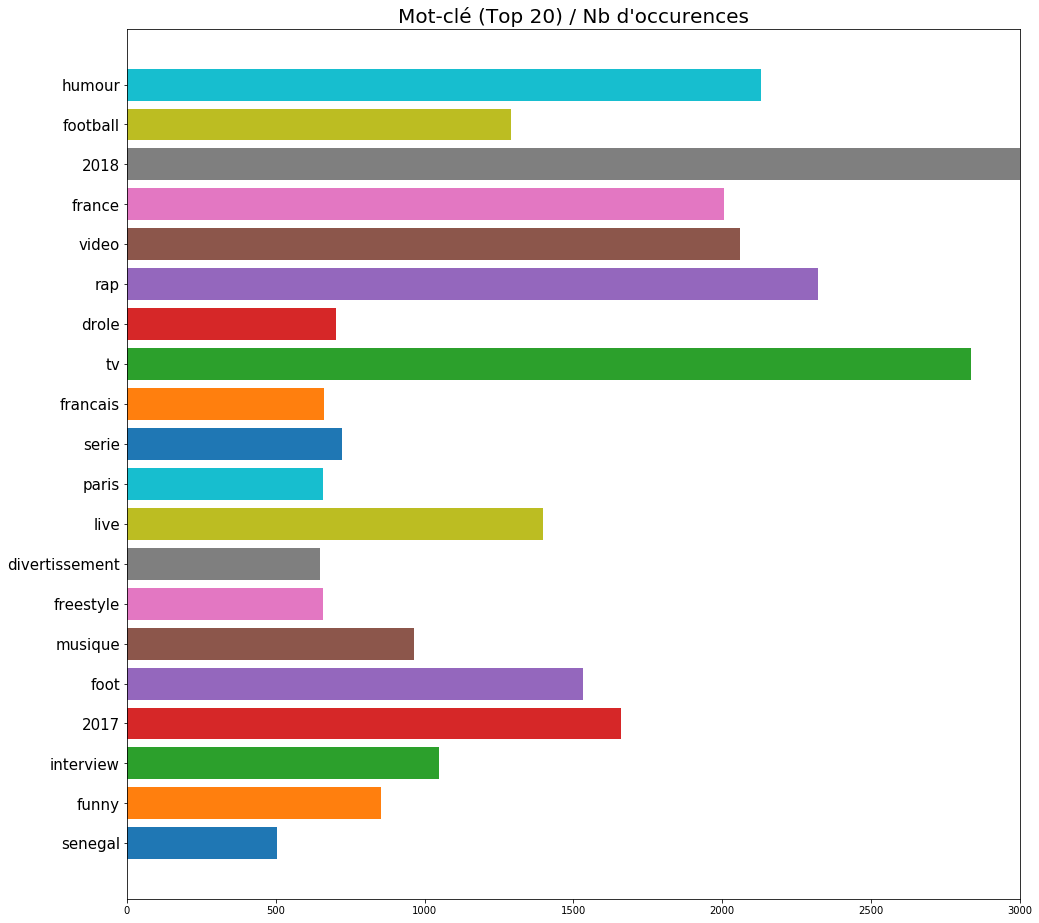

In [197]:
plt.figure(figsize=(16,16))

for x in range(len(top_tags)-1,-1,-1): 
    plt.barh(top_tags[x], df[df["tags"].str.contains(top_tags[x])].count())

plt.yticks(size=15)
plt.xlim(0,3000)
plt.title("Mot-clé (Top 20) / Nb d'occurences", fontsize=20)
plt.show()

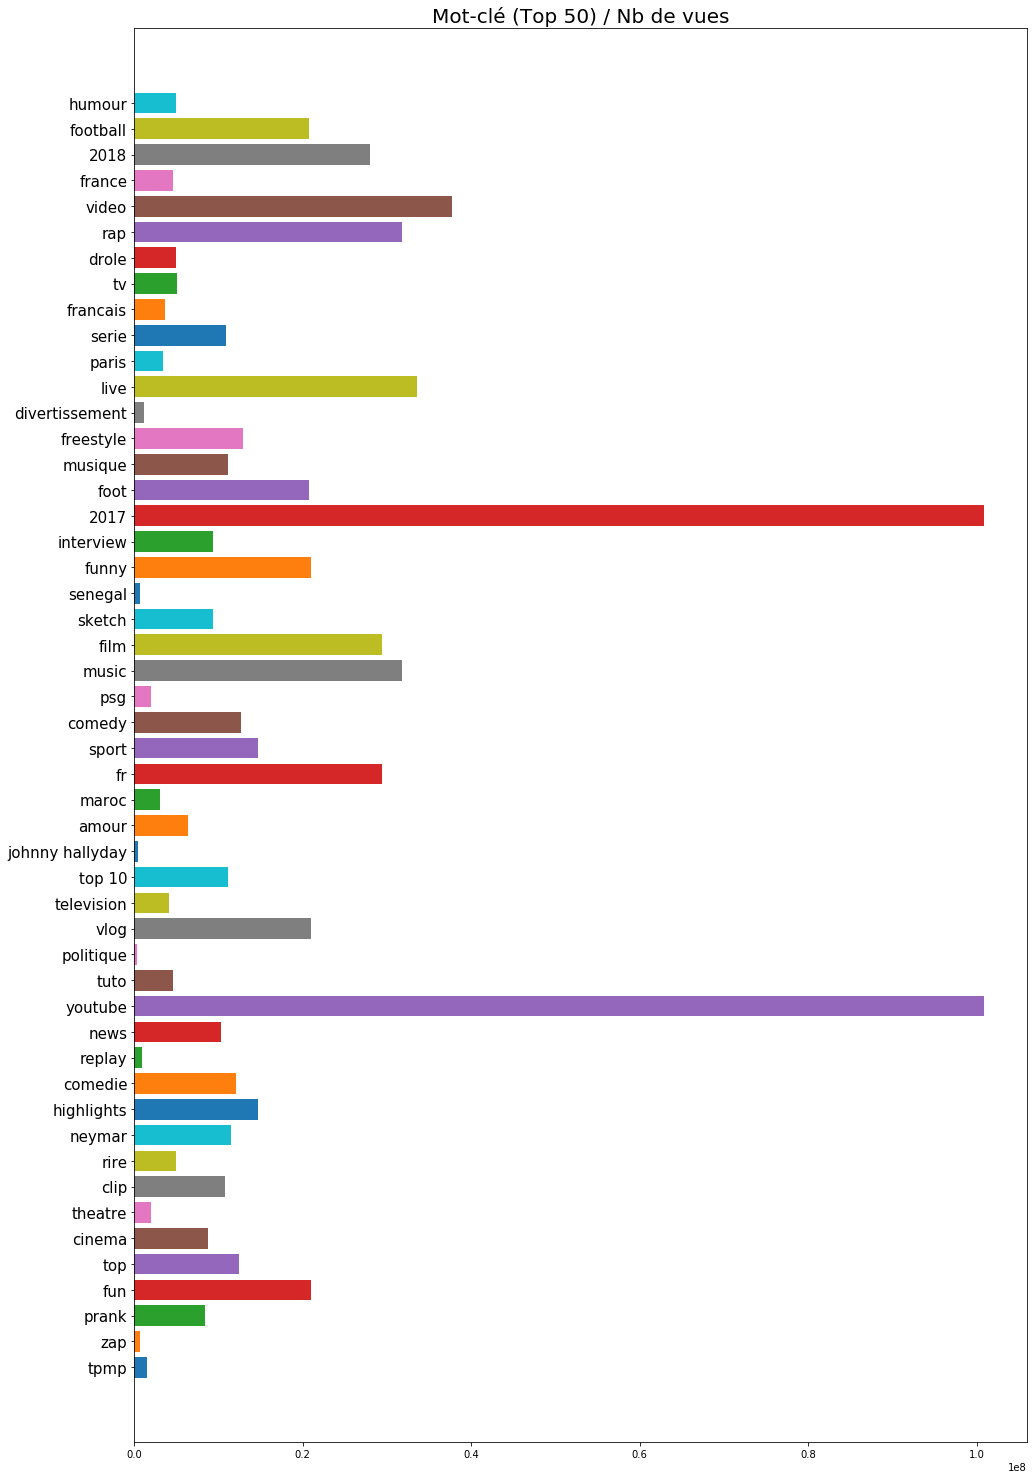

In [75]:
plt.figure(figsize=(16,26))

for x in range(len(top_tags)-1,-1,-1): 
    plt.barh(top_tags[x], df["views"][df["tags"].str.contains(top_tags[x])])

plt.yticks(size=15)
plt.title("Mot-clé (Top 50) / Nb de vues", fontsize=20)
plt.show()

### Taux d'engagement
nb likes + nb commentaires / nb vues

In [192]:
df_engage = data_fr.copy()

In [193]:
df_engage = df_engage[~df_engage["category"].isnull()]

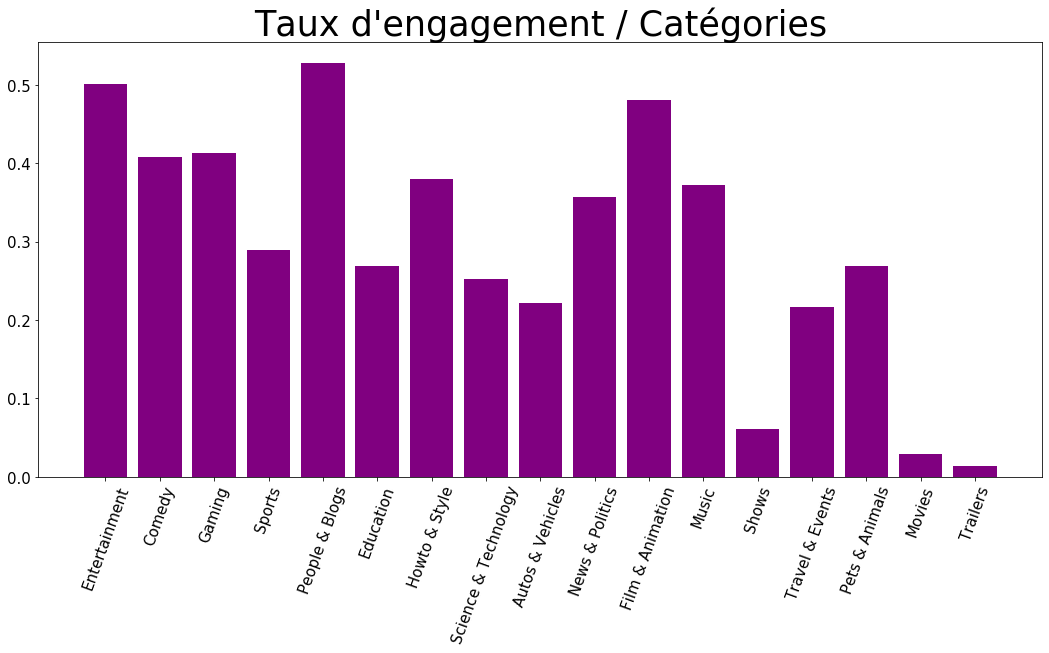

In [62]:
plt.figure(figsize=(18,8))

plt.bar(df_engage["category"], df_engage["engagement"], color="purple")
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Taux d'engagement / Catégories", size=35)

plt.show()

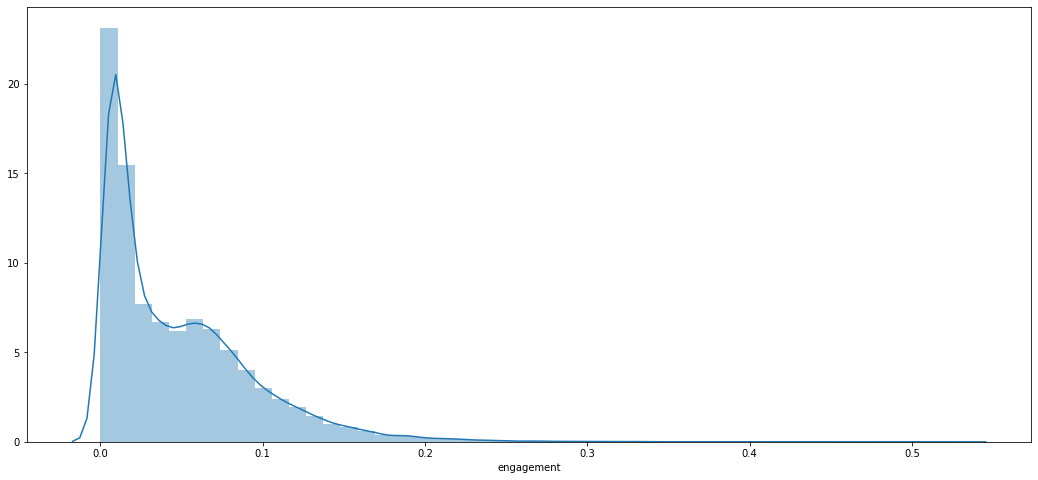

In [63]:
plt.figure(figsize=(18,8))
sns.distplot(df_engage["engagement"])
plt.show()

<Figure size 1296x576 with 0 Axes>

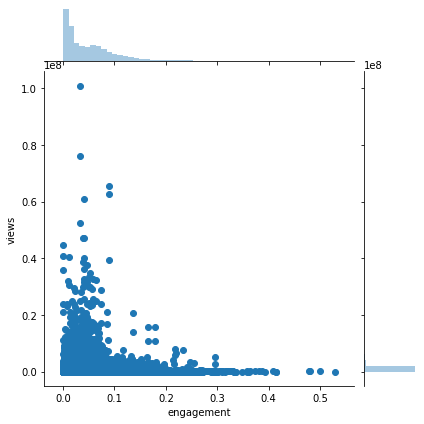

In [64]:
plt.figure(figsize=(18,8))
sns.jointplot(data=df_engage, x="engagement", y="views")
plt.show()

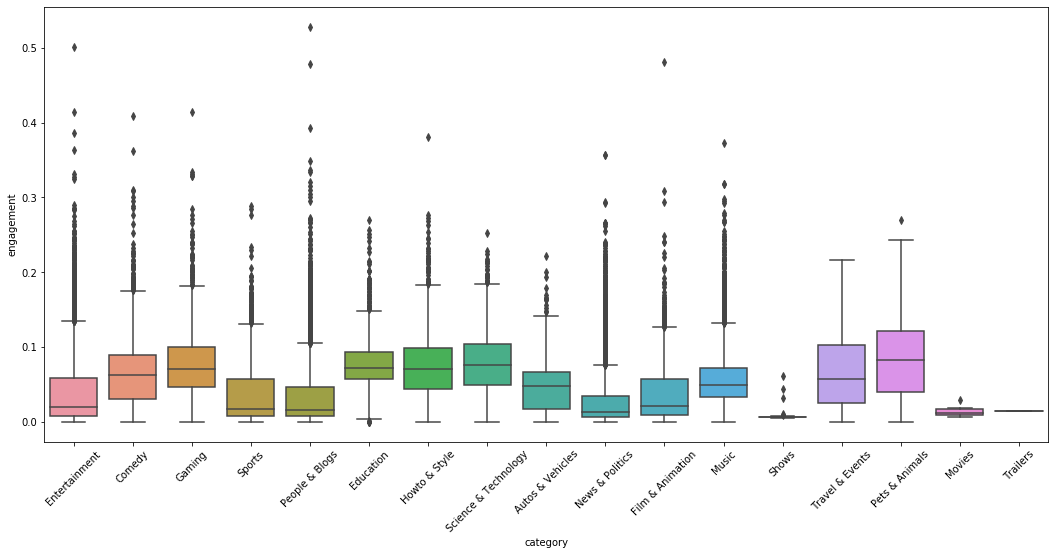

In [65]:
plt.figure(figsize=(18,8))
sns.boxplot(data=df_engage, x="category", y="engagement")
plt.xticks(rotation=45)
plt.show()

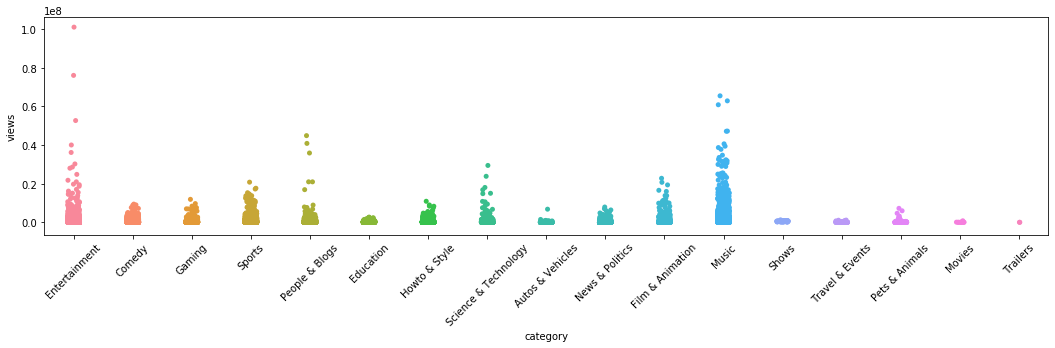

In [66]:
plt.figure(figsize=(18,4))
sns.stripplot(data=df_engage, x="category", y="views")
plt.xticks(rotation=45)
plt.show()

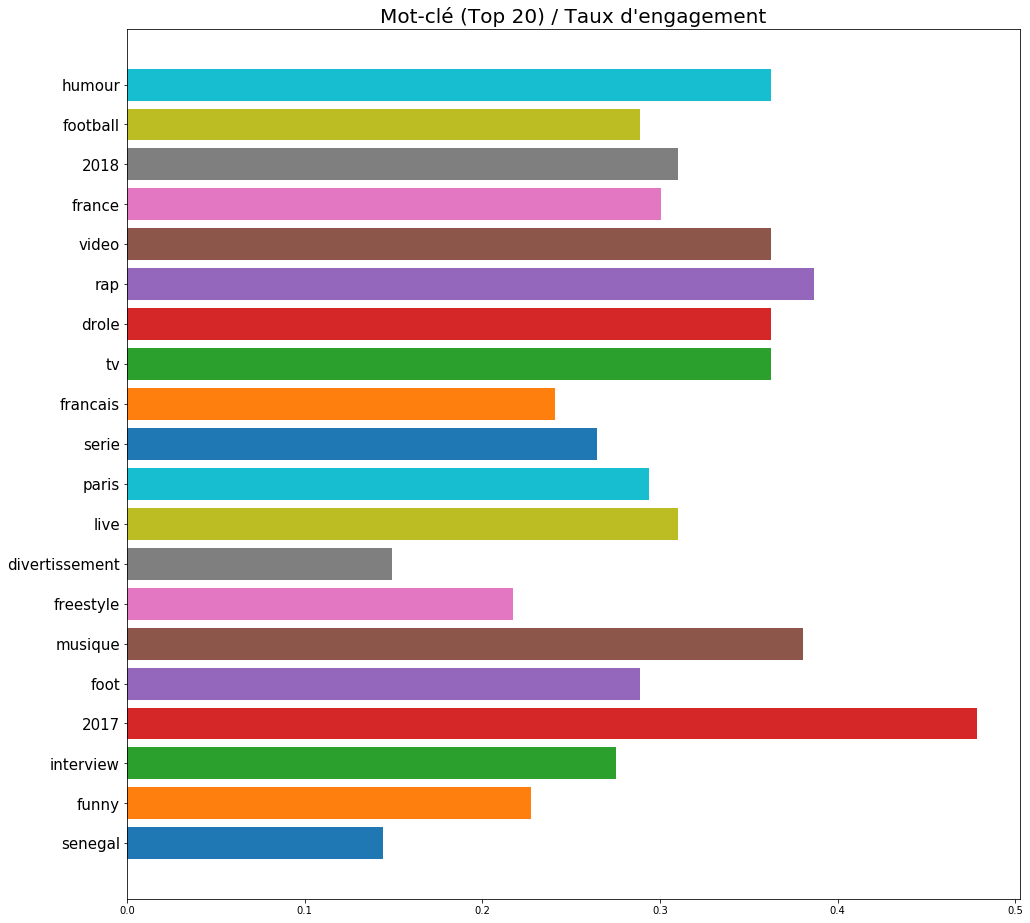

In [196]:
plt.figure(figsize=(16,16))

for x in range(len(top_tags)-1,-1,-1): 
    plt.barh(top_tags[x], df_engage["engagement"][df_engage["tags"].str.contains(top_tags[x])])

plt.yticks(size=15)
plt.title("Mot-clé (Top 20) / Taux d'engagement", fontsize=20)
plt.show()

### Graphs par durée

In [59]:
df_duree = data_fr.copy()

In [60]:
df_duree = df_duree[~df_duree["duree"].isnull()]
df_duree = df_duree[~df_duree["category"].isnull()]

In [61]:
df_duree.shape

(31121, 19)

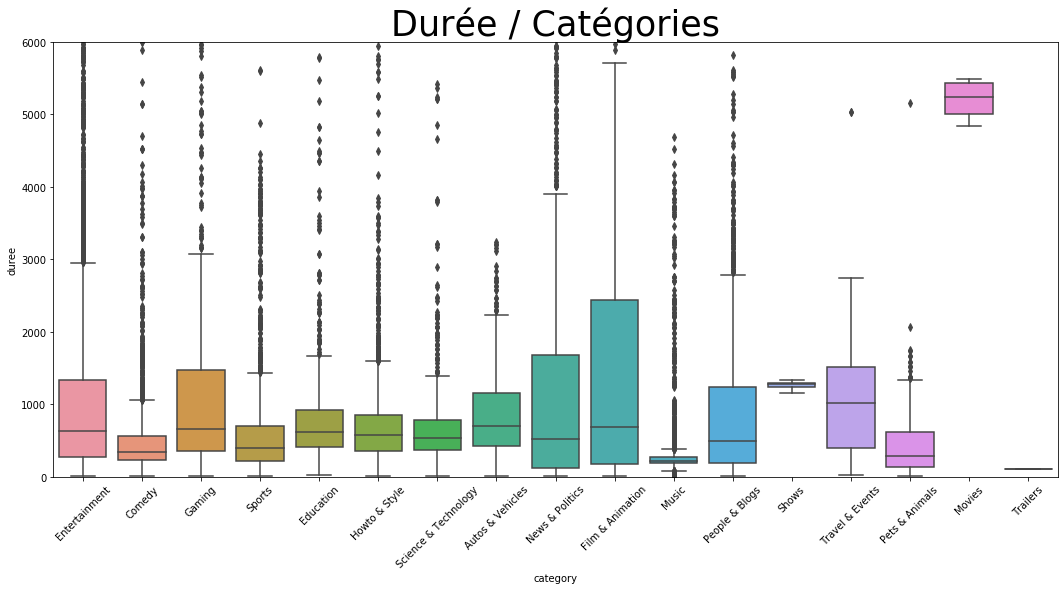

In [47]:
plt.figure(figsize=(18,8))

sns.boxplot(data=df_duree, x="category", y="duree")

plt.xticks(rotation=45)
plt.ylim(0, 6000)
plt.title("Durée / Catégories", fontsize=35)

plt.show()

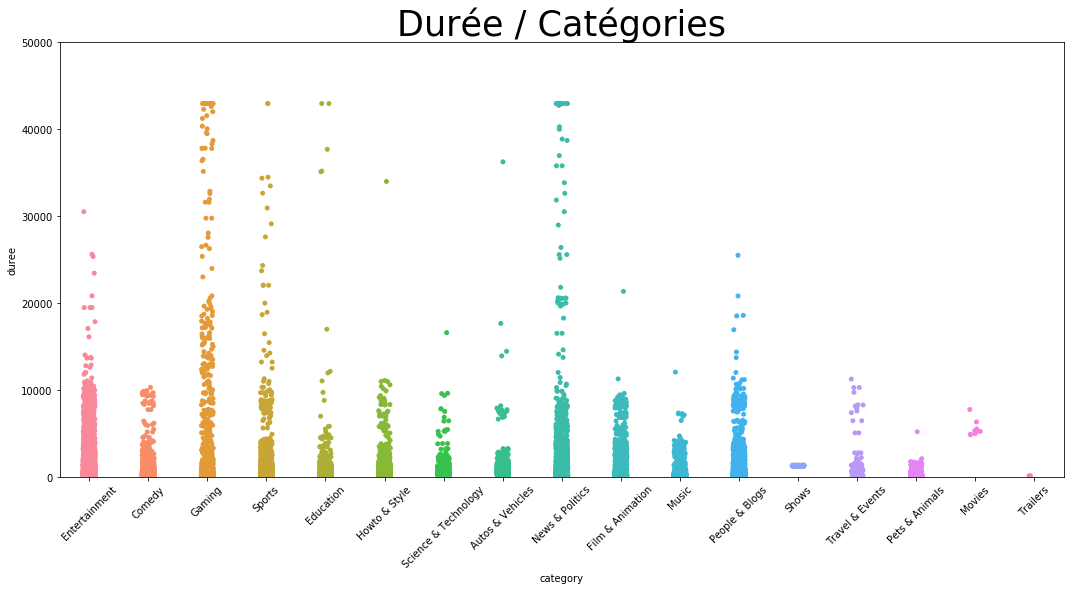

In [46]:
plt.figure(figsize=(18,8))

sns.stripplot(data=df_duree, x="category", y="duree")

plt.xticks(rotation=45)
plt.ylim(0,50000)
plt.title("Durée / Catégories", fontsize=35)

plt.show()

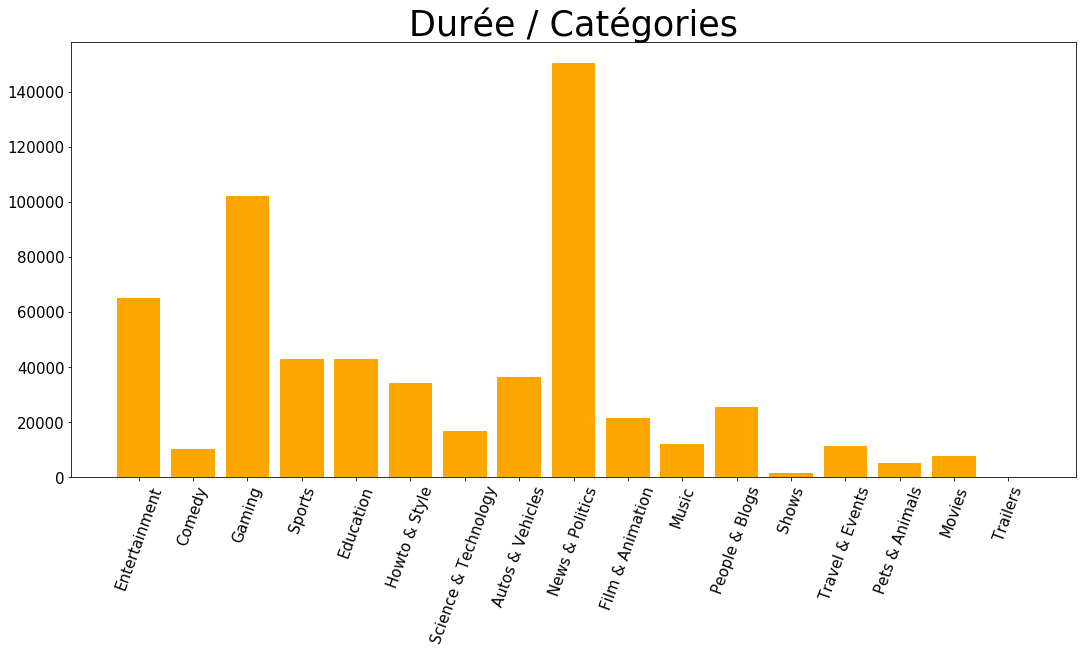

In [63]:
plt.figure(figsize=(18,8))

plt.bar(df_duree["category"], df_duree["duree"], color="orange")
plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.title("Durée / Catégories", size=35)

plt.show()

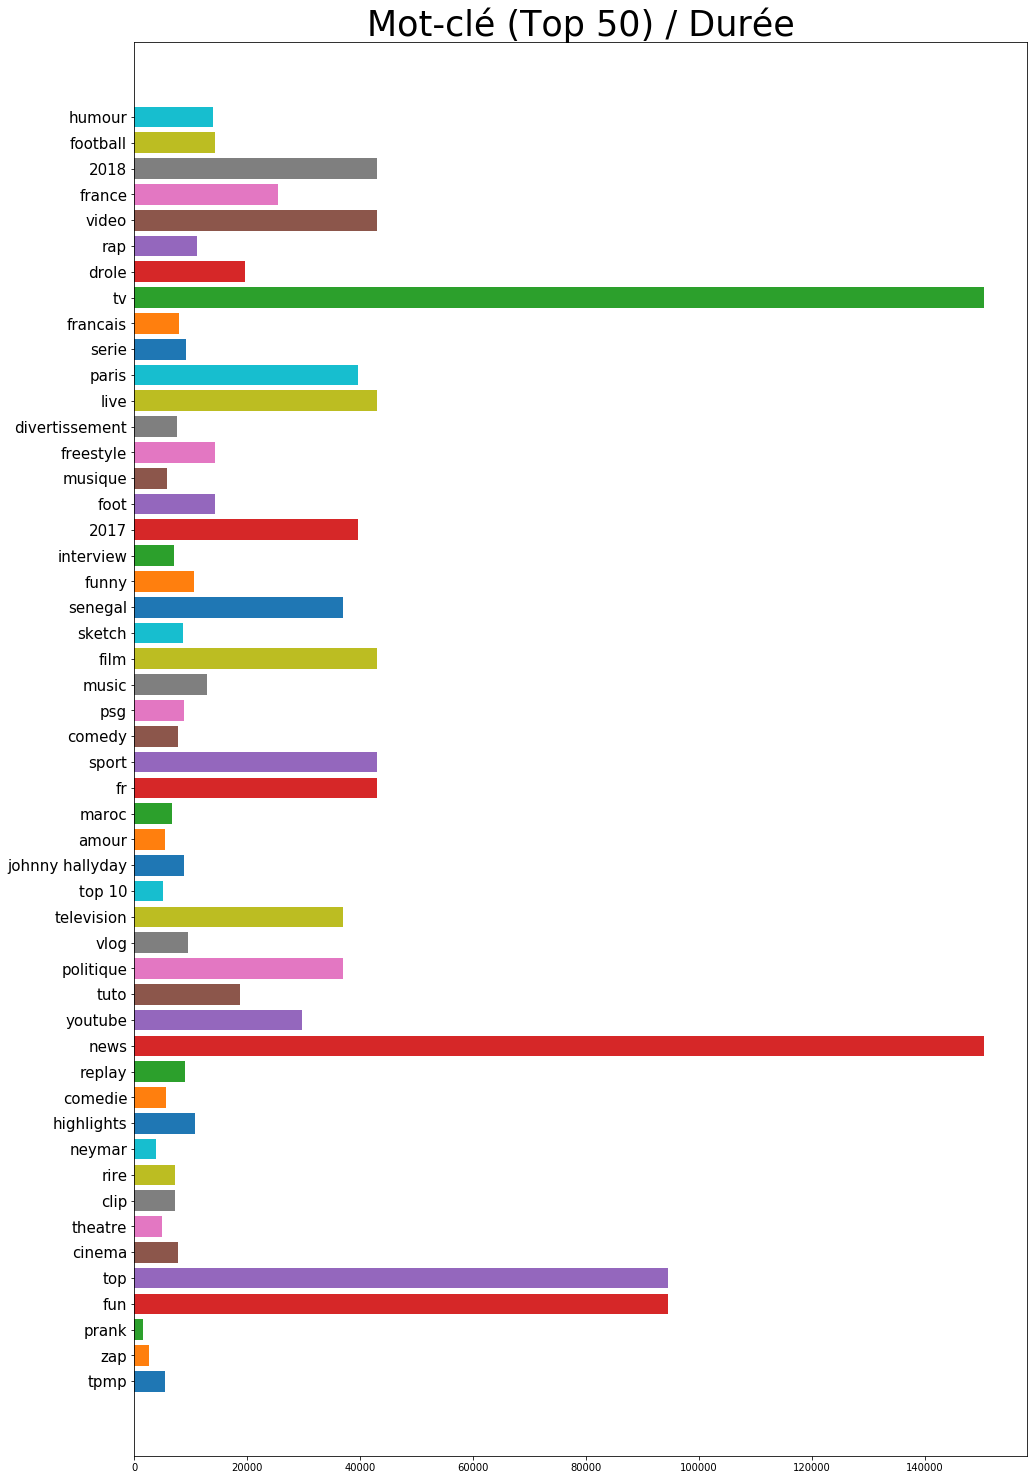

In [61]:
plt.figure(figsize=(16,26))

for x in range(len(top_tags)-1,-1,-1): 
    plt.barh(top_tags[x], df_duree["duree"][df_duree["tags"].str.contains(top_tags[x])])

plt.yticks(size=15)
plt.title("Mot-clé (Top 50) / Durée", fontsize=35)
plt.show()

#### Durée moyenne d'une vidéos

In [79]:
# Durée moyonne des vidéos en secondes
moy = df_duree["duree"].mean()
print(f"La durée moyenne des vidéos est de {moy} secondes")

# Moyenne en minutes par vidéos
minutes = moy//60
secondes = moy-(minutes*60)
print(f"Soit, {int(minutes)} minutes et {round(secondes)} secondes")

La durée moyenne des vidéos est de 1148.9436714758524 secondes
Soit, 19 minutes et 9 secondes


#### Durée total des vidéos

In [91]:
# Durée totale des vidéos
total = df_duree["duree"].sum()
print(f"La durée totale des vidéos est de {total} secondes")

# Total en heures, minutes et secondes
minutes = total//60
secondes = total-(minutes*60)

heures = minutes//60
minutes = minutes-(heures*60)

jours = heures//24
heures = heures-(jours*24)

annee = jours//365
jours = jours-(annee*365)
print(f"Soit, {int(annee)} an, {int(jours)} jours, {int(heures)} heures, {int(minutes)} minutes et {int(round(secondes))} secondes")

La durée totale des vidéos est de 35756276.0 secondes
Soit, 1 an, 48 jours, 20 heures, 17 minutes et 56 secondes


#### Nombre de chaines différentes

In [129]:
# Nombre de chaines différentes
nb_chaines = df["channel_title"].unique().shape[0]
nb_videos = df.shape[0]
moy = nb_videos / nb_chaines
print(f"{nb_chaines} chaines ont publiées en moyenne {round(moy, 2)} vidéos chacunes")

6680 chaines ont publiées en moyenne 6.1 vidéos chacunes


In [104]:
channels = df["channel_title"].unique()
channels

array(['Le Raptor Dissident', 'Le Labo', 'Daniil le Russe', ...,
       'Supercell', 'Boumé-Sama', 'Talent Recap'], dtype=object)

In [119]:
print("Moyennes : ")
for x in channels:
    print("--------------------------------------")
    print("Chaine : ", x)
    filtre = df["channel_title"] == x
    print(df[["views", "likes", "dislikes", "comment_count", "engagement", "duree"]][filtre].mean())
    print("--------------------------------------")

Moyennes : 
--------------------------------------
Chaine :  Le Raptor Dissident
views            409506.285714
likes             35070.285714
dislikes           2807.000000
comment_count      4720.571429
engagement            0.085033
duree                65.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Le Labo
views            398941.500000
likes             12029.750000
dislikes            518.250000
comment_count       930.750000
engagement            0.039303
duree              2762.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Daniil le Russe
views            661846.323529
likes             61219.647059
dislikes            757.470588
comment_count     11071.529412
engagement            0.099329
duree               565.147059
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Joueur Du Grenier
views     

views            171203.229167
likes             12448.854167
dislikes            483.708333
comment_count      2156.500000
engagement            0.068190
duree               492.800000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  NAMOR*
views            81934.500000
likes             7320.875000
dislikes           215.250000
comment_count      591.625000
engagement           0.094689
duree              731.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  TAREKENIRL
views            46803.593220
likes             3595.338983
dislikes           812.898305
comment_count      769.406780
engagement           0.099242
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Alrima Officiel
views            326486.100000
likes             18575.500000
dislikes            532.800000
comment_count     

views            23160.333333
likes              114.666667
dislikes            23.666667
comment_count       72.583333
engagement           0.008137
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Chouftv - شوف تيفي
views            325361.802326
likes              2722.441860
dislikes            493.186047
comment_count      1398.383721
engagement            0.013057
duree               380.213333
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Cleboa.comOFFICIEL
views            16006.400000
likes              125.400000
dislikes            27.800000
comment_count      118.600000
engagement           0.013637
duree             2182.200000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Marodi TV Sénégal
views            312970.065089
likes              4062.982249
dislikes            375.337

views            11882.000000
likes              503.000000
dislikes            44.000000
comment_count        7.000000
engagement           0.042922
duree              222.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  elbotola media
views            392350.00000
likes              2560.00000
dislikes            307.00000
comment_count      1175.00000
engagement            0.00952
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  C dans l'air
views            9945.542056
likes              49.457944
dislikes           19.560748
comment_count       0.766355
engagement          0.005134
duree            3869.438095
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  أخبار المغرب
views            412870.00000
likes              2179.00000
dislikes            463.00000
comment_count       616.00

Chaine :  ERTV Officiel
views            27969.289474
likes              888.263158
dislikes            23.184211
comment_count      247.894737
engagement           0.027022
duree             1333.416667
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Thomas Gauthier
views            48046.724138
likes             7903.379310
dislikes            96.965517
comment_count      484.517241
engagement           0.170969
duree              334.142857
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  AR-EN-FR LANGUAGES
views            48650.000000
likes              486.000000
dislikes            69.000000
comment_count      238.000000
engagement           0.014882
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Top Channel Albania
views            106220.105263
likes               806.526316
dislikes  

views            26406.000000
likes              556.000000
dislikes            46.000000
comment_count        6.000000
engagement           0.021283
duree             7378.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Cristobal1624
views            67598.000000
likes              740.000000
dislikes             8.000000
comment_count       55.000000
engagement           0.011761
duree              160.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  RobotUnderdog2
views            436650.000000
likes             29499.000000
dislikes            928.000000
comment_count      4689.000000
engagement            0.078296
duree              2111.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Potxeca
views            17198.000000
likes             1304.000000
dislikes            17.000000
comment_count     

views            59110.347826
likes              932.586957
dislikes            45.673913
comment_count       65.565217
engagement           0.020423
duree              297.521739
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  FOOTBALL MINDS
views            1.169440e+06
likes            5.158000e+03
dislikes         4.775000e+02
comment_count    9.688333e+02
engagement       5.295279e-03
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Jojol
views            205481.235294
likes             11137.485294
dislikes            948.220588
comment_count      1191.602941
engagement            0.059087
duree               615.794118
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  CinemaSins
views            1.062695e+06
likes            3.527673e+04
dislikes         1.438045e+03
comment_count    5.5615

--------------------------------------
Chaine :  Screen Junkies
views            1.237251e+06
likes            4.232540e+04
dislikes         1.216550e+03
comment_count    5.841200e+03
engagement       3.781488e-02
duree            3.103500e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  David Lefrançois
views            4457.615385
likes             491.384615
dislikes            6.461538
comment_count      55.000000
engagement          0.120929
duree             902.583333
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Hervé Cuisine
views            16512.000000
likes             1360.064516
dislikes            16.032258
comment_count      116.193548
engagement           0.089331
duree              392.129032
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  La Ferme du Mineur
views            1866.000000
likes         

views            4696.000000
likes               5.000000
dislikes            3.000000
comment_count       0.000000
engagement          0.001065
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Attessia TV
views            131369.532847
likes               968.890511
dislikes            145.430657
comment_count       174.598540
engagement            0.008564
duree              2962.477612
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  M6 Buzz
views            27194.125000
likes              308.250000
dislikes            14.000000
comment_count       22.750000
engagement           0.011885
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Occulture
views            17835.000000
likes             2336.750000
dislikes            15.750000
comment_count      281.250000
e

Chaine :  CineMania
views            20195.000000
likes             1212.000000
dislikes            21.500000
comment_count       72.500000
engagement           0.064796
duree              302.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  One News New Zealand
views            30805.00000
likes                4.00000
dislikes             4.00000
comment_count        8.00000
engagement           0.00039
duree               34.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Diriliş Televizyon
views            110566.000000
likes              1179.000000
dislikes             30.000000
comment_count       348.000000
engagement            0.013811
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Construction Cayola
views            16674.0000
likes                5.0000
dislikes       

views            13867.250000
likes              946.041667
dislikes            58.083333
comment_count      130.125000
engagement           0.094459
duree              548.541667
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Secrets d'Histoire Officiel
views            16923.142857
likes              302.428571
dislikes            11.000000
comment_count       31.571429
engagement           0.020265
duree             6986.250000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Vaia Vanessa
views            3933.000000
likes             295.000000
dislikes            5.000000
comment_count      48.000000
engagement          0.088254
duree             845.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ibighit
views            1.945121e+07
likes            2.285289e+06
dislikes         3.314427e+04
comment_count    3

--------------------------------------
--------------------------------------
Chaine :  Les Guignols
views            38182.181818
likes              944.727273
dislikes            39.727273
comment_count       49.181818
engagement           0.021721
duree              127.166667
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Cauet
views            41476.875000
likes             1871.900000
dislikes            94.637500
comment_count       85.762500
engagement           0.046005
duree              449.157895
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Séan Garnier
views            364616.80000
likes             16596.80000
dislikes            196.00000
comment_count       802.80000
engagement            0.06641
duree               670.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Linkin Park
views            39

views            153834.000000
likes              8629.285714
dislikes            408.285714
comment_count       308.000000
engagement            0.064345
duree               268.571429
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Nouvelles 24
views            125318.800000
likes               319.800000
dislikes            265.600000
comment_count        85.400000
engagement            0.003531
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Kontre Kulture
views            4382.0
likes               0.0
dislikes            0.0
comment_count       0.0
engagement          0.0
duree             698.0
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Nouvelles 24h
views            34046.512821
likes               79.589744
dislikes            31.846154
comment_count       26.717949
engagement   

--------------------------------------
--------------------------------------
Chaine :  Superflame
views            38385.00000
likes             4907.00000
dislikes            29.00000
comment_count      293.00000
engagement           0.13547
duree              473.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Mam's
views            10713.833333
likes              431.166667
dislikes            12.500000
comment_count       17.333333
engagement           0.076848
duree              195.666667
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  La France Agricole
views            2539.000000
likes              24.000000
dislikes            0.000000
comment_count       0.000000
engagement          0.009453
duree             293.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  blabla المغاربة casa
views            2

views            3727.000000
likes              23.000000
dislikes            4.000000
comment_count       2.000000
engagement          0.006708
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Latino Vicente
views            4.765077e+06
likes            6.669850e+04
dislikes         2.602500e+03
comment_count    7.543500e+03
engagement       1.510070e-02
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  JJ Darriet
views            11295.000000
likes              182.000000
dislikes             6.000000
comment_count       27.000000
engagement           0.018504
duree               70.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  100/ Potins GALSEN
views            64307.000000
likes              510.000000
dislikes            74.000000
comment_count      126

views            63033.937500
likes             3789.875000
dislikes           130.875000
comment_count      300.687500
engagement           0.066766
duree              501.562500
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Drone My Life
views            3868.500000
likes             374.500000
dislikes           16.000000
comment_count     169.000000
engagement          0.144226
duree             715.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  hasan mehdi
views            128398.808511
likes              1001.638298
dislikes            132.021277
comment_count        60.446809
engagement            0.008602
duree              2424.891304
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Parents !
views            8411.500000
likes             208.375000
dislikes            7.375000
comment_count      30.375000

views            7744.500000
likes              47.500000
dislikes            6.000000
comment_count      12.250000
engagement          0.009509
duree             623.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Girlyalex83
views            6656.250000
likes             441.500000
dislikes           22.000000
comment_count     128.750000
engagement          0.090637
duree             777.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Comores infos
views            14415.000000
likes              315.000000
dislikes            17.000000
comment_count      305.000000
engagement           0.043011
duree             2138.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  KILLUMINATY SMG OFFICIEL
views            36184.357143
likes             2023.214286
dislikes           175.428571
comment_count      943

views            94895.500000
likes             6082.285714
dislikes            96.000000
comment_count      200.142857
engagement           0.065424
duree              645.285714
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Forlan TV
views            48789.395833
likes             2993.541667
dislikes          1582.958333
comment_count     1980.541667
engagement           0.129113
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Ligue 1 Conforama
views            381572.333333
likes              4307.717949
dislikes            259.000000
comment_count       612.102564
engagement            0.013669
duree               252.693333
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  S3 Freestyle
views            57834.185185
likes             3978.740741
dislikes            34.185185
comment_count 

Chaine :  Zeste de Science
views            6523.000000
likes             235.500000
dislikes            0.500000
comment_count      19.000000
engagement          0.084813
duree             106.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Maroc prod HD
views            149649.600000
likes              3390.800000
dislikes            326.600000
comment_count      1030.000000
engagement            0.027057
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Labes Ettounsia
views            84211.392857
likes              459.785714
dislikes            78.107143
comment_count       73.892857
engagement           0.006048
duree             2191.680000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Nzwamba
views            23205.500000
likes              426.250000
dislikes            26.000

Chaine :  Mich ' Aile Ange Tarot
views            1900.000000
likes             152.000000
dislikes            5.000000
comment_count      44.000000
engagement          0.103158
duree            1815.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Shyv's World
views            6591.500000
likes             363.000000
dislikes           12.000000
comment_count     126.500000
engagement          0.084985
duree            1007.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  mohamed ounan
views            55925.000000
likes              144.000000
dislikes            23.000000
comment_count       53.000000
engagement           0.003523
duree               88.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  La Tronche en Biais
views            30047.666667
likes             4038.000000
dislikes            96.

views            197277.153846
likes                 0.000000
dislikes              0.000000
comment_count         0.000000
engagement            0.000000
duree               108.615385
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  OGC Nice
views            4771.857143
likes             167.714286
dislikes            3.142857
comment_count      14.142857
engagement          0.038897
duree             269.142857
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  MagicRecordsPoland
views            72393.666667
likes             1164.666667
dislikes            76.000000
comment_count       58.000000
engagement           0.015658
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  MutVlog ♥
views            1615.000000
likes             225.000000
dislikes            0.000000
comment_count      35.0000

Chaine :  Dzjoker Chemsou
views            2.689560e+06
likes            2.051817e+05
dislikes         4.219000e+03
comment_count    5.262167e+04
engagement       7.848586e-02
duree            2.800000e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  toto0479iwrc
views            4172.500000
likes              45.500000
dislikes            1.500000
comment_count       1.500000
engagement          0.012197
duree             392.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Serge le Mytho
views            95668.000000
likes             6023.000000
dislikes            40.500000
comment_count      180.500000
engagement           0.055575
duree             1196.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  xaumeo
views            46101.500000
likes             1224.000000
dislikes           585.000000
commen

dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Evan Et Marco
views            9821.000000
likes            1602.666667
dislikes            6.333333
comment_count     153.333333
engagement          0.177261
duree              70.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Thomas Et Ses Amis
views            2544.000000
likes               7.000000
dislikes            4.000000
comment_count       0.000000
engagement          0.002752
duree            1912.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  VD M.A
views            343369.692308
likes              2221.076923
dislikes            190.384615
comment_count       518.615385
engagement            0.009065
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Ghost'N'us Par

views            2309.000000
likes               0.000000
dislikes            0.000000
comment_count       1.000000
engagement          0.000433
duree             281.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Alain Vaillancourt
views            6285.300000
likes             386.900000
dislikes            5.500000
comment_count      39.400000
engagement          0.068164
duree             796.200000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Vamso Vidéo
views            2510.666667
likes             329.000000
dislikes            1.666667
comment_count      26.000000
engagement          0.142235
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  JC2R Officiel
views            5191.266667
likes             399.066667
dislikes           95.466667
comment_count     181.333333
engageme

views            81714.000000
likes              256.000000
dislikes            39.000000
comment_count       66.000000
engagement           0.003941
duree               61.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Netflix
views            1.427060e+06
likes            4.901824e+04
dislikes         1.972882e+03
comment_count    4.841294e+03
engagement       3.527579e-02
duree            9.030769e+01
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Rugby Paradise
views            7498.833333
likes              40.166667
dislikes            2.333333
comment_count       3.000000
engagement          0.006538
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Pourquoi Avoir Peur ?
views            12611.272727
likes             1525.636364
dislikes            30.181818
comment_count      278

views            29874.000000
likes             1911.666667
dislikes            29.000000
comment_count      278.333333
engagement           0.074227
duree             2120.333333
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  MisterJDay
views            306099.50000
likes             31160.50000
dislikes            683.00000
comment_count      3087.00000
engagement            0.11091
duree               992.50000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Cyrus North
views            52707.769231
likes             4883.461538
dislikes           146.307692
comment_count      576.461538
engagement           0.091796
duree              638.230769
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Rigostyle
views            18127.333333
likes               96.222222
dislikes            15.222222
comment_count       11.77777

views            3415.000000
likes             521.000000
dislikes            5.000000
comment_count      82.000000
engagement          0.176574
duree             841.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Simsorama
views            14260.666667
likes             1917.333333
dislikes            10.666667
comment_count      591.000000
engagement           0.165025
duree             1559.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Diana Lisa
views            3925.00000
likes             413.00000
dislikes            9.00000
comment_count      81.00000
engagement          0.12586
duree             432.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Chakeup
views            32661.000000
likes             3825.000000
dislikes            23.000000
comment_count      582.000000
engagement          

views            4891.15625
likes             392.34375
dislikes          149.93750
comment_count     168.84375
engagement          0.10535
duree            1468.40000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  TOP 14 - Officiel
views            9436.300000
likes              59.400000
dislikes            2.600000
comment_count       4.200000
engagement          0.008346
duree             231.300000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  loutéw tay
views            224104.333333
likes              1476.666667
dislikes            268.333333
comment_count       394.666667
engagement            0.007201
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Momo Bousfiha l مومو بوصفيحة
views            120318.888889
likes              3235.444444
dislikes            123.222222
comment_coun

Chaine :  djo pazzo
views            7215.000000
likes             193.500000
dislikes            5.000000
comment_count       9.000000
engagement          0.029781
duree             198.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Damien Chasse Passion
views            3623.000000
likes              36.000000
dislikes            5.000000
comment_count      10.000000
engagement          0.012697
duree             294.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Comedy Central UK
views            322523.041667
likes              3979.708333
dislikes            247.000000
comment_count       572.625000
engagement            0.013956
duree               255.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Marvel FR
views            558623.250000
likes             13816.750000
dislikes            338.5

Chaine :  Mark Rober
views            3.670052e+06
likes            1.260170e+05
dislikes         2.696000e+03
comment_count    9.254000e+03
engagement       3.685806e-02
duree            6.030000e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Je ne suis pas une senior !
views            48822.00000
likes             1143.00000
dislikes            15.00000
comment_count       38.00000
engagement           0.02419
duree              164.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Minis Poneys
views            5162.00000
likes             556.00000
dislikes            2.00000
comment_count      51.00000
engagement          0.11759
duree             256.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  source info
views            8003.000000
likes              96.000000
dislikes            3.000000
comment_

Chaine :  MX Reflexion
views            1389.500000
likes              63.000000
dislikes            0.000000
comment_count       6.500000
engagement          0.050821
duree             470.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  خطوة
views            219684.00000
likes               712.00000
dislikes            171.00000
comment_count       136.00000
engagement            0.00386
duree               117.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Tunisia Road to World Cup 2018
views            19014.000000
likes               58.000000
dislikes             7.500000
comment_count       19.500000
engagement           0.005166
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  LE P.BREZIANI TV
views            3794.000000
likes               0.000000
dislikes            0.0

Chaine :  La Vallée Village TV
views            2599.000000
likes               8.000000
dislikes            0.000000
comment_count       0.000000
engagement          0.003078
duree              30.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  FeuChattertonVEVO
views            20038.000000
likes              865.250000
dislikes            15.750000
comment_count       59.250000
engagement           0.046221
duree              286.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  almarssadpro TV
views            43541.000000
likes              292.000000
dislikes            11.000000
comment_count       97.000000
engagement           0.008934
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  RosGang Officiel
views            2031.000000
likes             222.000000
dislikes         

views            79685.000000
likes             1135.000000
dislikes            82.000000
comment_count      101.000000
engagement           0.015511
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Break News
views            4761.400000
likes             263.700000
dislikes            7.500000
comment_count      83.900000
engagement          0.097073
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Lucas Jeanne d'Arc
views            4318.000000
likes             344.500000
dislikes            5.500000
comment_count      26.000000
engagement          0.084827
duree             400.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Thies 24
views            88227.000000
likes             1632.000000
dislikes           150.000000
comment_count      760.000000
enga

views            18168.500000
likes              380.500000
dislikes             7.500000
comment_count        7.500000
engagement           0.023047
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Algérie Bladna
views            118117.10000
likes               453.60000
dislikes             88.70000
comment_count       301.50000
engagement            0.00771
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Thomas Chauffray
views            1453.000000
likes              14.000000
dislikes            0.000000
comment_count       0.000000
engagement          0.009635
duree             344.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Nozman Bonus
views            27375.000000
likes             2797.000000
dislikes            19.000000
comment_count      135

--------------------------------------
Chaine :  Foot à la TV
views            23595.000000
likes              250.000000
dislikes            15.000000
comment_count       47.000000
engagement           0.012671
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Илья Абельмазов
views            4323.000000
likes              32.000000
dislikes            3.000000
comment_count       4.000000
engagement          0.008328
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  CarpeCanal
views            1728.000000
likes             158.000000
dislikes            1.000000
comment_count      24.000000
engagement          0.105324
duree            1110.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  caramel كراميل
views            25936.000000
likes             1222.000000

views            1486.000000
likes             117.000000
dislikes            7.000000
comment_count      54.000000
engagement          0.115074
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  BRIQUEFAN !
views            1785.000000
likes             235.000000
dislikes            3.500000
comment_count      39.500000
engagement          0.153772
duree             261.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  LOCKLEAR
views            25301.00000
likes             4435.00000
dislikes           143.00000
comment_count      461.00000
engagement           0.19351
duree               98.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Broc' Addict
views            2605.200000
likes             179.400000
dislikes            1.600000
comment_count      54.400000
engagement         

views            63038.156250
likes              155.500000
dislikes            68.312500
comment_count       46.687500
engagement           0.003281
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  BABOR LELEFAN
views            13872.250000
likes             1669.750000
dislikes            22.000000
comment_count      157.000000
engagement           0.130624
duree              371.250000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Yohann_ Chicha
views            2170.000000
likes             155.000000
dislikes            2.000000
comment_count      17.000000
engagement          0.079263
duree             945.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  DIEN QUAN Comedy / Hài
views            2.439566e+06
likes            1.275067e+04
dislikes         1.736000e+03
comment_count  

Chaine :  Saregama TVShows
views            99115.428571
likes              750.885714
dislikes           111.771429
comment_count       74.914286
engagement           0.008525
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  soleil newsinfo
views            11271.000000
likes               83.500000
dislikes            28.500000
comment_count      165.500000
engagement           0.020566
duree             3327.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  PressTV Français
views            10877.714286
likes              101.285714
dislikes             8.714286
comment_count       38.428571
engagement           0.022176
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ANDY
views            2.012809e+06
likes            1.670396e+05
dislikes         3.739400e

views            34178.333333
likes              178.000000
dislikes            47.000000
comment_count       40.666667
engagement           0.005799
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Neuf Officiel
views            31270.50000
likes              125.50000
dislikes            22.00000
comment_count       16.00000
engagement           0.00469
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  WEST HAM
views            977894.833333
likes              5257.833333
dislikes           1385.166667
comment_count      1292.833333
engagement            0.008902
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  La Pieuvre & DascoProlo
views            20808.000000
likes               76.333333
dislikes            48.333333
comment_count 

Chaine :  Lord Esperanza
views            59191.87500
likes             7002.06250
dislikes            72.31250
comment_count      540.18750
engagement           0.11511
duree              240.62500
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Klay
views            529822.333333
likes             32192.000000
dislikes           1759.166667
comment_count      2914.833333
engagement            0.058631
duree               255.600000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  View From Mina
views            9564.000000
likes             994.000000
dislikes           14.833333
comment_count      55.333333
engagement          0.108486
duree             516.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  YorgosToys TV
views            38137.076923
likes             1518.358974
dislikes           115.538462
comment_

views            88334.000000
likes            17208.000000
dislikes            30.000000
comment_count     1885.000000
engagement           0.216146
duree               22.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  laurasmet
views            7714.000000
likes              42.000000
dislikes           11.000000
comment_count       6.000000
engagement          0.006222
duree            5762.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ポケモン公式YouTubeチャンネル
views            1163333.0
likes                  0.0
dislikes               0.0
comment_count          0.0
engagement             0.0
duree                 31.0
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  STAR 24 TV
views            36938.000000
likes              200.750000
dislikes            34.500000
comment_count       62.250000
engagement     

views            758216.166667
likes             65416.666667
dislikes            708.000000
comment_count      2180.500000
engagement            0.081096
duree               236.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  4KEUS GVNG OFFICIEL
views            406808.666667
likes             15631.857143
dislikes            535.333333
comment_count      1046.714286
engagement            0.035158
duree               209.190476
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Parole de chat
views            248928.052632
likes             21755.526316
dislikes            284.421053
comment_count      1236.473684
engagement            0.087189
duree               132.210526
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Coupe de la Ligue
views            255269.600000
likes              3268.500000
dislikes          

--------------------------------------
--------------------------------------
Chaine :  Jerome M Voyance
views            9468.000000
likes              17.000000
dislikes           16.000000
comment_count       8.500000
engagement          0.002068
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  sébastien veron
views            4941.000000
likes              55.000000
dislikes            2.000000
comment_count      11.000000
engagement          0.013358
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  JemKei
views            47365.000000
likes              513.000000
dislikes            10.000000
comment_count       23.000000
engagement           0.011316
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  STUDIOCANAL France
views           

views            93749.800000
likes             6627.000000
dislikes           125.866667
comment_count      938.266667
engagement           0.079242
duree             2016.733333
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Dehmo Kalina
views            119114.750000
likes              4738.000000
dislikes             51.500000
comment_count       163.750000
engagement            0.044404
duree               201.250000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  2MTV
views            291609.152174
likes              3452.565217
dislikes            508.195652
comment_count       251.086957
engagement            0.012622
duree              2134.533333
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Neplanet Football
views            503743.000000
likes              1526.000000
dislikes            128.000000
comment_co

--------------------------------------
--------------------------------------
Chaine :  Lufy & Enzo
views            271507.666667
likes             23893.000000
dislikes            246.333333
comment_count      2287.333333
engagement            0.100037
duree               385.666667
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  RangerSpatial8
views            48647.000000
likes             7459.000000
dislikes            37.000000
comment_count      694.000000
engagement           0.167595
duree              147.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Gabriel & Corentin
views            3362.000000
likes             452.000000
dislikes           11.000000
comment_count      91.500000
engagement          0.162225
duree             597.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Kenza Zouiten
vie

views            34863.454545
likes             2277.454545
dislikes            24.181818
comment_count      109.818182
engagement           0.068925
duree              513.700000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  MissGameuse26 / Laura
views            1855.000000
likes               0.000000
dislikes            0.000000
comment_count      91.250000
engagement          0.049617
duree            1321.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  miss vip93
views            109822.000000
likes               641.000000
dislikes             61.500000
comment_count        86.500000
engagement            0.007138
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Investig'Action - Michel Collon
views            2602.000000
likes             262.000000
dislikes           13.000000

dtype: float64
--------------------------------------
--------------------------------------
Chaine :  INZKITCHEN
views            64204.000000
likes             5721.166667
dislikes           104.333333
comment_count      310.000000
engagement           0.091064
duree              513.666667
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Marine Leleu
views            40467.750000
likes             2729.000000
dislikes            77.000000
comment_count      223.500000
engagement           0.080898
duree              411.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Sara'h Officiel
views            168290.076923
likes             18033.307692
dislikes            192.846154
comment_count      1359.846154
engagement            0.116357
duree               204.846154
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Fa

views            3282.500000
likes             280.500000
dislikes            2.500000
comment_count      95.000000
engagement          0.137745
duree              55.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  FRVN NEWS
views            4666.0000
likes               7.0000
dislikes            7.0000
comment_count       0.0000
engagement          0.0015
duree              98.0000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  PS4 MOVIE KEMP76
views            5764.000000
likes              88.500000
dislikes            6.500000
comment_count      23.000000
engagement          0.020444
duree            5877.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  TongTongTv 통통영상
views            4.386869e+06
likes            7.579600e+04
dislikes         1.996000e+03
comment_count    1.091600e+04
engagement       1

views            17599.500000
likes             2153.500000
dislikes            94.000000
comment_count      299.500000
engagement           0.141355
duree              574.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Benjamin Lubszynski
views            3897.500000
likes             204.250000
dislikes            7.750000
comment_count      27.750000
engagement          0.059686
duree            2590.750000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Premium Sintesi
views            2.028905e+06
likes            2.112082e+04
dislikes         1.238353e+03
comment_count    1.964647e+03
engagement       1.223714e-02
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Re: Take
views            104577.142857
likes             12225.428571
dislikes            160.571429
comment_count      

views            8344.000000
likes              81.000000
dislikes            4.000000
comment_count       4.000000
engagement          0.010187
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  DragonBallSuper-France.FR
views            4320.000000
likes              21.000000
dislikes            0.000000
comment_count       4.000000
engagement          0.005787
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Iris Pie
views            10972.416667
likes              431.166667
dislikes            32.250000
comment_count      258.083333
engagement           0.067997
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  CBGames
views            55227.000000
likes             4891.000000
dislikes            78.666667
comment_count      973.333333


views            136254.000000
likes               657.000000
dislikes            160.000000
comment_count       274.000000
engagement            0.006833
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  BLACKPINK
views            1.490688e+06
likes            2.207900e+05
dislikes         1.425833e+03
comment_count    2.424317e+04
engagement       1.683941e-01
duree            1.633333e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  FISHARE
views            4294.000000
likes             399.000000
dislikes           11.000000
comment_count      29.000000
engagement          0.099674
duree              97.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  قناة الشرق
views            337348.000000
likes              2855.000000
dislikes            461.000000
comment_count      1294.00000

views            2266.000000
likes             366.000000
dislikes            2.000000
comment_count      41.000000
engagement          0.179612
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Le Duo Passionné Pêche/Chasse
views            1760.000000
likes              32.000000
dislikes            2.000000
comment_count       8.000000
engagement          0.022727
duree             305.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Demi Portion
views            25918.000000
likes             1933.000000
dislikes            21.666667
comment_count      152.333333
engagement           0.096722
duree              192.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Philippe Demerliac
views            1342.00000
likes             201.00000
dislikes            4.00000
comment_count    

views            645647.000000
likes              7362.000000
dislikes            221.000000
comment_count      1002.000000
engagement            0.012954
duree                51.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Cam Off
views            9053.750000
likes             490.250000
dislikes           32.750000
comment_count      81.500000
engagement          0.058844
duree             540.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Baly et Capucine
views            22589.125000
likes             2600.437500
dislikes            18.937500
comment_count      306.250000
engagement           0.130589
duree              485.750000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Turkish Series مسلسل تركي
views            105159.00000
likes              1166.00000
dislikes             77.00000
comment_co

views            715403.000000
likes             13024.500000
dislikes           1005.000000
comment_count      1511.000000
engagement            0.017933
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  pubLPDM
views            5902.000000
likes              59.000000
dislikes           32.000000
comment_count      19.000000
engagement          0.013216
duree              21.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  MosalsalatTV 2M
views            27237.000000
likes              318.500000
dislikes            29.500000
comment_count       18.500000
engagement           0.012668
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  e-penser par ailleurs
views            60149.500000
likes             3628.500000
dislikes           334.500000
comment_count  

--------------------------------------
--------------------------------------
Chaine :  Simon Agropix
views            2602.000000
likes             114.000000
dislikes            0.000000
comment_count      17.000000
engagement          0.050346
duree             396.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Esra Erol'da
views            46291.750000
likes              182.000000
dislikes            50.000000
comment_count       21.250000
engagement           0.004387
duree             8076.250000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Sunubuzz Tv
views            31369.000000
likes              224.500000
dislikes            11.000000
comment_count       17.000000
engagement           0.007946
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Fiasko 18
views            168

--------------------------------------
--------------------------------------
Chaine :  LES DÉCAFÉINÉS - Le Duo
views            8168.333333
likes             410.000000
dislikes           10.666667
comment_count      26.000000
engagement          0.090347
duree             102.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Guillaume TV
views            37084.333333
likes              245.666667
dislikes            56.333333
comment_count       38.666667
engagement           0.008003
duree               39.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  LoryLyn
views            69938.285714
likes             3763.000000
dislikes            65.714286
comment_count      608.142857
engagement           0.062041
duree              973.571429
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ♥ المغرب أبو الدنيا ♥
vi

Chaine :  CHANNEL-TV
views            151093.750000
likes              1736.562500
dislikes            213.875000
comment_count       223.500000
engagement            0.011442
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Red Chillies Entertainment
views            3.957090e+06
likes            1.418170e+05
dislikes         7.280000e+03
comment_count    1.490000e+04
engagement       3.960410e-02
duree            4.800000e+01
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  SINEY
views            63081.500000
likes             1797.500000
dislikes           610.500000
comment_count      378.500000
engagement           0.030099
duree              571.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Ora News Lajme
views            118664.000000
likes               214.000000
dislikes      

views            1.028156e+06
likes            4.573500e+03
dislikes         3.859000e+03
comment_count    2.011000e+03
engagement       6.348066e-03
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  BAOBAB NEWS
views            74786.500000
likes              721.000000
dislikes            69.500000
comment_count       55.000000
engagement           0.009095
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Fifty Shades
views            2.726394e+06
likes            3.160900e+04
dislikes         5.811500e+03
comment_count    3.481500e+03
engagement       1.177829e-02
duree            1.210000e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  justintimberlakeVEVO
views            4.023067e+06
likes            1.034198e+05
dislikes         1.354633e+04
comment_count  

Chaine :  Journal Eu
views            6024.000000
likes               4.000000
dislikes            0.000000
comment_count       0.000000
engagement          0.000664
duree             145.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Léo Gousserey
views            6734.000000
likes              12.000000
dislikes            1.000000
comment_count      12.000000
engagement          0.003564
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Movieclips Trailers
views            1.059992e+06
likes            1.872550e+04
dislikes         6.275000e+02
comment_count    2.479000e+03
engagement       1.880078e-02
duree            1.305000e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Bob Marley Experience
views            190404.000000
likes               556.000000
dislikes             70.

views            520023.000000
likes              3168.000000
dislikes           1211.000000
comment_count      1469.000000
engagement            0.008917
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  chof akhbar
views            135256.20000
likes               964.80000
dislikes            193.40000
comment_count       351.20000
engagement            0.00882
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Stony Music TV
views            10939.50000
likes              898.50000
dislikes            28.50000
comment_count       41.50000
engagement           0.08888
duree              222.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  2TV
views            245146.875000
likes              1145.000000
dislikes            381.500000
comment_count       194.375

views            7587.000000
likes             410.000000
dislikes           12.166667
comment_count      47.000000
engagement          0.060774
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Olivier Schmitt
views            3310.000000
likes             381.000000
dislikes            7.000000
comment_count     122.000000
engagement          0.151964
duree             858.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Tractoriste Passion
views            3729.000000
likes             239.000000
dislikes            2.000000
comment_count      33.500000
engagement          0.073024
duree             165.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  FrenchSub
views            2408.800000
likes             257.200000
dislikes            1.000000
comment_count      29.200000
engagem

views            5214.333333
likes             192.666667
dislikes           17.000000
comment_count      29.666667
engagement          0.042745
duree            1157.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  MT PRODUCTION
views            393435.000000
likes              8037.000000
dislikes            360.000000
comment_count      1013.000000
engagement            0.023003
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  MIX TV
views            239737.00000
likes                 0.00000
dislikes              0.00000
comment_count      1174.00000
engagement            0.00418
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Juju Def
views            6421.000000
likes             699.000000
dislikes           11.000000
comment_count     142.000000
engag

views            36259.000000
likes              113.000000
dislikes            18.000000
comment_count       14.000000
engagement           0.003503
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Aaron & Zola
views            6885.666667
likes             537.333333
dislikes           24.666667
comment_count      49.333333
engagement          0.088179
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  FutureVEVO
views            676651.200000
likes             35069.000000
dislikes           1233.400000
comment_count      2556.800000
engagement            0.048719
duree               257.600000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Marie Vwy
views            8559.250000
likes             342.750000
dislikes            6.000000
comment_count      53.000000
e

Chaine :  The View
views            278775.333333
likes              3342.666667
dislikes            458.333333
comment_count      2626.333333
engagement            0.022349
duree               420.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Antsa & Mendrika
views            3340.000000
likes             347.000000
dislikes            0.000000
comment_count      85.000000
engagement          0.129341
duree             144.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  United Launch Alliance
views            187209.000000
likes              1249.000000
dislikes            164.000000
comment_count       236.000000
engagement            0.007932
duree              6429.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  MDD TV Divulgation
views            4241.333333
likes             568.333333
dislikes 

--------------------------------------
--------------------------------------
Chaine :  GA GO
views            2788.000000
likes              61.000000
dislikes            2.000000
comment_count       9.000000
engagement          0.025108
duree              86.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Tengo John
views            21313.000000
likes             4183.000000
dislikes            30.000000
comment_count      449.000000
engagement           0.217332
duree              205.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Elly Trann
views            17534.000000
likes               27.000000
dislikes            17.000000
comment_count        4.000000
engagement           0.001768
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ICEMAN
views            19231.000000
like

views            116329.148148
likes              1510.185185
dislikes            262.777778
comment_count       186.296296
engagement            0.015582
duree               536.769231
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  CSSFR 111
views            67092.333333
likes              163.333333
dislikes           148.333333
comment_count       75.666667
engagement           0.004399
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ActuTV Actualités et Vidéos
views            54038.083333
likes              109.083333
dislikes           175.333333
comment_count      174.166667
engagement           0.005145
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Bruce boar hunter
views            3581.000000
likes             104.666667
dislikes           12.666667
co

views            839824.454545
likes              6657.136364
dislikes            679.409091
comment_count         0.000000
engagement            0.007868
duree              5600.950000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Le Royaliste
views            50361.000000
likes             3162.000000
dislikes            78.000000
comment_count      385.500000
engagement           0.066824
duree              606.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  杰威爾音樂 JVR Music
views            840897.000000
likes             36877.000000
dislikes            756.000000
comment_count      4157.500000
engagement            0.048741
duree               263.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  l'express
views            29444.0000
likes              103.0000
dislikes            12.0000
comment_count   

views            74159.000000
likes             8593.000000
dislikes           115.000000
comment_count     1562.000000
engagement           0.136936
duree              461.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  jbalvinVEVO
views            7.257434e+06
likes            2.392254e+05
dislikes         1.186677e+04
comment_count    1.657985e+04
engagement       4.377597e-02
duree            2.042308e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  gaelle garcia diaz
views            564147.666667
likes             57871.666667
dislikes           7517.000000
comment_count      6319.000000
engagement            0.115925
duree               343.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Envoyé Spécial
views            45497.500000
likes              343.500000
dislikes            24.750000
comment_c

views            14579.50000
likes              576.00000
dislikes            16.50000
comment_count       36.50000
engagement           0.04319
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  NOUVELLE TENDANCE
views            14947.50000
likes              121.00000
dislikes            40.50000
comment_count      110.00000
engagement           0.01677
duree             2732.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Nezable
views            38966.000000
likes             1286.000000
dislikes            22.000000
comment_count      250.000000
engagement           0.039419
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Pauli'shou
views            5678.500000
likes             824.000000
dislikes            3.000000
comment_count     106.500000
engagement

views            15428.500000
likes             1691.500000
dislikes            44.500000
comment_count      126.500000
engagement           0.096271
duree              268.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Fail2Mars
views            29120.500000
likes              230.000000
dislikes            18.500000
comment_count       77.000000
engagement           0.012011
duree               39.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Impartial Andelys
views            3961.000000
likes               1.000000
dislikes            1.000000
comment_count       0.000000
engagement          0.000252
duree              81.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  KDBcomps17
views            444286.500000
likes              1792.500000
dislikes            178.500000
comment_count       122.5

--------------------------------------
--------------------------------------
Chaine :  Loulou Albajoue
views            4025.000000
likes               0.000000
dislikes            0.000000
comment_count     494.000000
engagement          0.122733
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Roxane ASMR
views            31678.181818
likes             1125.727273
dislikes           106.727273
comment_count      256.363636
engagement           0.042989
duree             1111.909091
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  NADEGE CANDLE
views            11593.000000
likes              507.000000
dislikes            90.000000
comment_count      184.000000
engagement           0.059605
duree              688.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Tayc Hz
views            59

--------------------------------------
--------------------------------------
Chaine :  Rudimental
views            226828.000000
likes             14888.000000
dislikes            114.500000
comment_count       518.000000
engagement            0.067852
duree               233.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Shaka Ponk
views            7659.500000
likes             766.500000
dislikes           14.000000
comment_count      68.500000
engagement          0.099708
duree             185.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Les Menuires
views            2550.000000
likes              16.000000
dislikes            1.000000
comment_count       0.000000
engagement          0.006275
duree              61.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ThreeDaysGraceVEVO
views          

Chaine :  HipHop Sounds
views            442123.000000
likes             10318.500000
dislikes            238.000000
comment_count        91.500000
engagement            0.021593
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Aynine
views            28003.000000
likes             3347.000000
dislikes            28.000000
comment_count      342.000000
engagement           0.131736
duree              232.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Nouveautés
views            4025.750000
likes              16.000000
dislikes            2.250000
comment_count       0.000000
engagement          0.004043
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  الريمونتادا
views            416661.500000
likes              3590.000000
dislikes            411.000000
comm

Chaine :  Sébastien Spring
views            3427.000000
likes             202.500000
dislikes            8.000000
comment_count      44.000000
engagement          0.073959
duree             534.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  roro chasse 22
views            2253.000000
likes             116.000000
dislikes            2.000000
comment_count      26.000000
engagement          0.063027
duree             300.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Tommy Reusta
views            31352.000000
likes             2836.000000
dislikes            24.000000
comment_count      293.000000
engagement           0.099802
duree              532.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  A.L.A
views            199930.000000
likes             18699.333333
dislikes           2872.000000
comment_c

views            4125.000000
likes             799.500000
dislikes            1.000000
comment_count     101.500000
engagement          0.206276
duree              84.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Says'z Officiel
views            33245.333333
likes             2209.666667
dislikes            35.000000
comment_count      145.333333
engagement           0.072761
duree              229.666667
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Frederic Delavier
views            11372.000000
likes              790.000000
dislikes            10.000000
comment_count      141.000000
engagement           0.081868
duree              384.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Carna Fishing 59
views            5428.333333
likes             167.333333
dislikes           10.333333
comment_count     1

views            219629.000000
likes              3948.000000
dislikes             64.000000
comment_count        61.000000
engagement            0.018254
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Marius Chasse
views            2697.000000
likes             218.000000
dislikes            0.000000
comment_count      19.000000
engagement          0.087875
duree              89.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Said InLife
views            4926.000000
likes             525.000000
dislikes           15.000000
comment_count     155.000000
engagement          0.138043
duree             516.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  VRAX OFFICIEL
views            24343.37500
likes             1276.25000
dislikes            30.50000
comment_count       95.75000
e

views            32176.000000
likes             1155.000000
dislikes            79.000000
comment_count      336.000000
engagement           0.046339
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Short Goals
views            3845.000000
likes              29.000000
dislikes            1.000000
comment_count       2.000000
engagement          0.008062
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  BIGTYME PRO
views            8436.00000
likes             225.00000
dislikes           15.00000
comment_count      90.00000
engagement          0.03734
duree             355.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Bramsito Music
views            4941.000000
likes             536.000000
dislikes            2.000000
comment_count      22.000000
engagement    

views            11950.000000
likes              418.000000
dislikes             6.000000
comment_count       32.000000
engagement           0.037657
duree              431.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  MEHDI YZ
views            65542.000000
likes             2982.125000
dislikes            69.250000
comment_count      281.000000
engagement           0.048467
duree              176.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Brain tube TV
views            511401.333333
likes             11781.666667
dislikes            469.000000
comment_count       869.000000
engagement            0.024142
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Tommy Desrochers
views            2999.615385
likes             323.230769
dislikes            4.230769
comment_count     

views            50834.000000
likes              622.000000
dislikes            43.000000
comment_count      121.000000
engagement           0.014616
duree               85.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  SRF Musik
views            54238.00000
likes              679.00000
dislikes            58.00000
comment_count       12.00000
engagement           0.01274
duree             7102.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Le Jimmy Labeeu
views            646612.363636
likes             45597.272727
dislikes           1943.181818
comment_count      2748.363636
engagement            0.072155
duree               465.545455
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Les Adix
views            40914.000000
likes              574.000000
dislikes            83.000000
comment_count      123.000

dtype: float64
--------------------------------------
--------------------------------------
Chaine :  GLG reviews
views            5021.800000
likes             583.400000
dislikes           12.600000
comment_count      71.400000
engagement          0.143226
duree            1305.600000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  CNBC
views            366055.00000
likes              1079.00000
dislikes             53.00000
comment_count       195.00000
engagement            0.00348
duree               287.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ESMA Movies
views            5991.500000
likes             712.500000
dislikes            5.500000
comment_count      54.000000
engagement          0.128421
duree             401.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  SEPHORAFRANCE
views            

views             3254.166667
likes              182.333333
dislikes            42.333333
comment_count        0.333333
engagement           0.067215
duree            17315.833333
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  BUZZ ANTILLES
views            8874.000000
likes              66.000000
dislikes           14.000000
comment_count       6.000000
engagement          0.008114
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  TAKA YAKA
views            2981.166667
likes             162.666667
dislikes           13.666667
comment_count      64.666667
engagement          0.084100
duree             475.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Terry Gale
views            18616.000000
likes               62.500000
dislikes            10.000000
comment_count        6.000000
engageme

views            31719.000000
likes              978.000000
dislikes            14.000000
comment_count       46.000000
engagement           0.032283
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Sais-tu aimer ? Kabylie
views            11278.00000
likes              280.00000
dislikes             6.00000
comment_count       28.00000
engagement           0.02731
duree               48.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  La grande dame
views            11141.00000
likes               27.00000
dislikes            54.00000
comment_count       16.00000
engagement           0.00386
duree               67.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Foot Marc Landers Résumé & But Europe
views            3475.000000
likes               7.000000
dislikes            2.000000

views            3757.000000
likes             268.000000
dislikes            6.000000
comment_count     109.000000
engagement          0.100346
duree            1133.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Go Fast50cc
views            3044.000000
likes             229.000000
dislikes           22.000000
comment_count      29.000000
engagement          0.084757
duree             295.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  MarcoLePhénix
views            26893.300000
likes              270.900000
dislikes             7.400000
comment_count       53.100000
engagement           0.011776
duree               66.800000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  RCmag
views             8773.000000
likes               69.000000
dislikes             1.000000
comment_count        1.000000
engagement 

dtype: float64
--------------------------------------
--------------------------------------
Chaine :  le dragon fps
views             5394.000000
likes              500.500000
dislikes            25.000000
comment_count        0.500000
engagement           0.091294
duree            13336.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Uneanîmes Le Mag
views            7683.500000
likes              56.500000
dislikes            1.500000
comment_count       9.500000
engagement          0.007663
duree             148.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  MotoTube
views            36427.666667
likes              952.333333
dislikes            21.333333
comment_count       47.000000
engagement           0.027641
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Madeincaro
vie

dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Pix'Perience
views             528.000000
likes              67.000000
dislikes            0.000000
comment_count       1.000000
engagement          0.128788
duree            6033.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  son vu
views            14647.50000
likes               61.00000
dislikes            14.50000
comment_count        8.50000
engagement           0.00442
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Fly With Haifa
views            82810.000000
likes            11661.000000
dislikes           181.000000
comment_count     1432.000000
engagement           0.158109
duree              395.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Muse
views            877

--------------------------------------
Chaine :  Morocco Talk Football
views            198499.000000
likes               843.000000
dislikes            262.000000
comment_count       103.000000
engagement            0.004766
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Ratpi170
views            7309.000000
likes              79.000000
dislikes            4.000000
comment_count      16.000000
engagement          0.012998
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Louis Salaun
views            3044.666667
likes             339.000000
dislikes            3.333333
comment_count      54.000000
engagement          0.129861
duree             223.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  WiizV
views            6600.111111
likes             470.666667


views            5012.000000
likes             238.000000
dislikes            3.000000
comment_count      17.000000
engagement          0.050878
duree             398.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  W2S
views            1.462289e+06
likes            1.055540e+05
dislikes         6.375000e+03
comment_count    1.704700e+04
engagement       8.384184e-02
duree            8.840000e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  NMWO #NewMuslimWorldOrder
views            2689.000000
likes             103.000000
dislikes            6.000000
comment_count      75.000000
engagement          0.066196
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  EventeLight
views            2931.000000
likes              54.000000
dislikes            1.000000
comment_count      26.000000
engag

views            2229.000000
likes             307.000000
dislikes            7.000000
comment_count      43.000000
engagement          0.157021
duree             332.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  turki 3sk
views            148899.5000
likes               786.0000
dislikes             51.0000
comment_count        41.5000
engagement            0.0048
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Adel Sweezy
views            198789.000000
likes             26670.000000
dislikes           2463.000000
comment_count      5768.000000
engagement            0.163178
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Karambolage en français – ARTE
views            3583.0000
likes             176.0000
dislikes           45.0000
comment_count     111.0

views            14476.000000
likes              791.666667
dislikes            16.666667
comment_count       30.666667
engagement           0.051803
duree               81.666667
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ISAMEQENI
views            6028.500000
likes              35.500000
dislikes            4.500000
comment_count       3.000000
engagement          0.005549
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Davie504
views            1.288609e+06
likes            6.398000e+04
dislikes         3.275000e+02
comment_count    4.713500e+03
engagement       5.185813e-02
duree            1.510000e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  automotomagazine
views            6203.00000
likes             207.75000
dislikes           16.50000
comment_count      52.75000
engagemen

views            181124.000000
likes               683.000000
dislikes             89.000000
comment_count       225.000000
engagement            0.005013
duree                55.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  StefanoBolis96
views            509995.000000
likes              3135.500000
dislikes            343.000000
comment_count       666.000000
engagement            0.011953
duree               265.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Dj Traffix Officiel
views            39474.357143
likes              560.142857
dislikes            59.000000
comment_count       69.428571
engagement           0.020950
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  L'insolent
views            89640.250000
likes             5655.250000
dislikes           187.750000
com

Chaine :  Dylan O'Brien France
views            6964.000000
likes             622.166667
dislikes            2.000000
comment_count      71.500000
engagement          0.105347
duree             364.666667
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Saint Lives
views            3834.000000
likes               7.000000
dislikes            0.000000
comment_count       1.000000
engagement          0.002087
duree              27.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Mohamed The OM
views            10529.000000
likes              112.000000
dislikes             6.000000
comment_count       53.000000
engagement           0.015671
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Bomoko Ya Mboka officiel
views            23185.000000
likes              124.000000
dislikes            

views             882.000000
likes             102.000000
dislikes            3.000000
comment_count       1.500000
engagement          0.119136
duree            5033.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  PSG NEWS
views            9038.500000
likes             311.500000
dislikes            6.000000
comment_count      88.500000
engagement          0.036952
duree             484.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Akhbar AL yawm
views            209068.00000
likes              1442.00000
dislikes            214.00000
comment_count       124.00000
engagement            0.00749
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  NavylittleMonster
views            365.000000
likes             43.000000
dislikes           2.000000
comment_count     14.000000
engagemen

Chaine :  Vanity Fair
views            1.865334e+06
likes            4.728250e+04
dislikes         2.871000e+03
comment_count    4.077000e+03
engagement       2.576472e-02
duree            5.720000e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  France Délire Pro
views            169362.500000
likes              7753.000000
dislikes            139.500000
comment_count       125.666667
engagement            0.070033
duree               133.166667
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Mona Elshazly
views            99451.000000
likes             1306.000000
dislikes            29.000000
comment_count      201.000000
engagement           0.015153
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Courant Indigo
views            3459.333333
likes             183.333333
dislikes          

views            3174.000000
likes             783.000000
dislikes            2.000000
comment_count     139.000000
engagement          0.290485
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Son Of Atlas
views            35779.000000
likes             1075.000000
dislikes            49.000000
comment_count       33.000000
engagement           0.030968
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Top Music TV
views            267267.00000
likes              4963.00000
dislikes            605.00000
comment_count       794.00000
engagement            0.02154
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ToonStudiosProd
views            4471.000000
likes             390.000000
dislikes            6.000000
comment_count      43.000000

views            745621.500000
likes             11608.000000
dislikes           1363.500000
comment_count       622.500000
engagement            0.014756
duree               320.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Cerise Daily
views            5958.000000
likes             665.000000
dislikes           10.500000
comment_count      49.500000
engagement          0.122762
duree             211.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  MAXITY
views            2117.000000
likes             240.000000
dislikes            3.000000
comment_count      37.000000
engagement          0.130846
duree              39.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Adam Bros
views            2283.000000
likes             320.000000
dislikes            2.000000
comment_count      42.000000
engagement 

dtype: float64
--------------------------------------
--------------------------------------
Chaine :  NeoGeofanatic
views            3592.000000
likes             202.000000
dislikes            7.000000
comment_count      34.000000
engagement          0.065702
duree             677.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Crypto - Analyste
views            2669.000000
likes              91.000000
dislikes            8.000000
comment_count      37.000000
engagement          0.047958
duree             532.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  โหนกระแส (Hone-Krasae) Official
views            597141.000000
likes              5124.000000
dislikes            611.750000
comment_count      5121.000000
engagement            0.016914
duree              2099.750000
dtype: float64
--------------------------------------
--------------------------------------


Chaine :  CLM INCH
views            96846.000000
likes              914.500000
dislikes            97.166667
comment_count      160.500000
engagement           0.010454
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Screwofficiel
views            92454.750000
likes             7140.000000
dislikes            93.750000
comment_count      359.625000
engagement           0.069744
duree              249.875000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  GolDeX
views            57943.000000
likes             5870.000000
dislikes          1256.000000
comment_count       64.000000
engagement           0.102411
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Karim Kas
views            25974.000000
likes             1539.666667
dislikes            32.000000
comment_cou

dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Le Mock
views            2770.000000
likes             400.000000
dislikes            1.000000
comment_count      49.000000
engagement          0.162094
duree             283.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Nisyamara
views            3261.000000
likes              75.000000
dislikes            1.000000
comment_count      31.000000
engagement          0.032505
duree            4009.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Best Pakistani Dramas
views            134678.000000
likes              1510.000000
dislikes            100.000000
comment_count       315.000000
engagement            0.013551
duree              2363.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  DreamWorksTV W

views            151364.500000
likes              2554.000000
dislikes            713.000000
comment_count       397.000000
engagement            0.019091
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Daddy DTech
views            13245.50000
likes              923.00000
dislikes            67.00000
comment_count      284.00000
engagement           0.07613
duree              341.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Éléctron libre
views            6234.5
likes               0.0
dislikes            0.0
comment_count       0.0
engagement          0.0
duree            1566.0
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  David Perrotin
views            45914.666667
likes               39.666667
dislikes            25.666667
comment_count      263.333333
engagement           0.00

--------------------------------------
--------------------------------------
Chaine :  برامج 2M
views            51149.00000
likes              335.00000
dislikes            51.00000
comment_count       22.00000
engagement           0.00698
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Myriam ait-sidhoum
views            5397.000000
likes               7.000000
dislikes            1.000000
comment_count       3.000000
engagement          0.001853
duree             110.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  B.Z TUBE
views            227362.625000
likes              1055.125000
dislikes            385.250000
comment_count       358.625000
engagement            0.007145
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Maroc News
views            1831

Chaine :  How Ridiculous
views            1.093008e+07
likes            2.845470e+05
dislikes         2.287225e+04
comment_count    3.573475e+04
engagement       3.397252e-02
duree            6.307500e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  giorgi zedginidze
views            1.359735e+06
likes            4.721500e+03
dislikes         2.955000e+02
comment_count    1.317500e+03
engagement       4.568201e-03
duree            2.940000e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Wildy LaBase
views            26252.500000
likes               98.500000
dislikes             9.500000
comment_count       11.000000
engagement           0.005801
duree               89.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  GOLATO
views            1.177864e+06
likes            6.653000e+03
dislikes         8.980000e+0

views            34981.000000
likes              720.000000
dislikes            17.000000
comment_count       33.000000
engagement           0.021526
duree              193.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  TRANS-FORMATIONS
views            4905.000000
likes             205.000000
dislikes            5.000000
comment_count      11.000000
engagement          0.044037
duree             365.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Hamza Vlog
views            127450.000000
likes              1024.000000
dislikes            142.000000
comment_count       165.000000
engagement            0.009329
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  01Team3V
views            6049.000000
likes              32.000000
dislikes            7.000000
comment_count       2.00000

views            823111.000000
likes             48432.000000
dislikes            592.000000
comment_count      2696.000000
engagement            0.062116
duree               274.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  TeknoMilesVEVO
views            212997.500000
likes              9665.000000
dislikes            171.000000
comment_count      1236.000000
engagement            0.051646
duree               270.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Diamond Platnumz
views            1.108720e+06
likes            2.294067e+04
dislikes         1.119333e+03
comment_count    4.405000e+03
engagement       2.455701e-02
duree            2.660000e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Samhini-سامحيني tv
views            570045.000000
likes              2301.000000
dislikes            861.00

views            1.866101e+06
likes            1.067600e+04
dislikes         1.797667e+03
comment_count    4.302667e+03
engagement       8.337140e-03
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Db
views            65388.000000
likes              151.500000
dislikes            57.500000
comment_count       14.500000
engagement           0.002447
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Alain Tasca
views            5196.000000
likes              40.000000
dislikes           28.000000
comment_count      46.000000
engagement          0.016551
duree            1488.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  HMtv
views            311286.000000
likes              1550.500000
dislikes            141.000000
comment_count       246.000000
engagement   

--------------------------------------
--------------------------------------
Chaine :  Doigby
views            267704.833333
likes             15065.000000
dislikes           1271.000000
comment_count      1301.000000
engagement            0.052255
duree              1042.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Lesblabla De Carla
views            210798.500000
likes              6947.000000
dislikes            680.500000
comment_count       711.000000
engagement            0.033755
duree               705.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  WeroKing
views            2.947238e+06
likes            5.135700e+04
dislikes         3.325500e+03
comment_count    8.494500e+03
engagement       1.983565e-02
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ComiCompil
views

views            112967.000000
likes              2838.000000
dislikes            225.000000
comment_count       149.000000
engagement            0.026441
duree               327.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Sahifa-Tv قناة الصحيفة
views            565333.583333
likes              3542.416667
dislikes            699.666667
comment_count       825.333333
engagement            0.007810
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  anton schuurmans
views            29091.000000
likes               94.500000
dislikes            19.500000
comment_count        7.500000
engagement           0.004224
duree               86.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Marion Nous
views            27939.500000
likes              187.875000
dislikes            59.2500

views            65170.000000
likes             1326.000000
dislikes            85.000000
comment_count      161.000000
engagement           0.022817
duree               92.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  MIMAN TV
views            5.697410e+06
likes            2.331000e+04
dislikes         5.534000e+03
comment_count    1.933000e+03
engagement       4.430610e-03
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Wassim / وسيم
views            218462.000000
likes                 0.000000
dislikes              0.000000
comment_count       333.000000
engagement            0.001524
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ParislawskiVEVO
views            28223.000000
likes              307.000000
dislikes            23.000000
comment_count   

--------------------------------------
--------------------------------------
Chaine :  Ty Dolla $ign
views            323302.000000
likes             22622.500000
dislikes            296.500000
comment_count      1016.500000
engagement            0.073121
duree               232.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Kafon
views            124362.000000
likes              7969.000000
dislikes            246.000000
comment_count       613.000000
engagement            0.069008
duree               181.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Nablon R
views            8197.000000
likes             232.000000
dislikes            8.000000
comment_count      25.000000
engagement          0.031353
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  MrGalagomusic
views         

views            1.181324e+06
likes            2.789700e+04
dislikes         5.480000e+02
comment_count    3.172000e+03
engagement       2.630015e-02
duree            2.070000e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  AHB ND
views            53256.000000
likes              185.000000
dislikes            41.000000
comment_count        2.000000
engagement           0.003511
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Battlefront FR
views            3972.00000
likes             378.00000
dislikes          120.00000
comment_count     201.00000
engagement          0.14577
duree              97.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  SkyInsta
views            247776.333333
likes              3178.000000
dislikes            235.000000
comment_count       187.000000
engageme

--------------------------------------
--------------------------------------
Chaine :  FootballPower
views            10170.000000
likes              131.000000
dislikes            10.000000
comment_count       58.000000
engagement           0.018584
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  SousaLights
views            5895.000000
likes              73.000000
dislikes            1.000000
comment_count      12.000000
engagement          0.014419
duree             442.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ViralVideoLab
views            432913.000000
likes                 0.000000
dislikes              0.000000
comment_count       477.000000
engagement            0.001102
duree                31.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Favorite Ellen's Videos

--------------------------------------
--------------------------------------
Chaine :  Congo Dialogue
views            20748.000000
likes              110.000000
dislikes            23.000000
comment_count       31.500000
engagement           0.006819
duree             3089.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Christiano Corporation
views            428096.000000
likes              1832.000000
dislikes            179.000000
comment_count       250.000000
engagement            0.004863
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ORNELLA TEMPESTA
views            26218.000000
likes             4212.000000
dislikes            19.000000
comment_count      732.000000
engagement           0.188573
duree              318.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  La

views            144396.333333
likes              1171.333333
dislikes            243.333333
comment_count       330.333333
engagement            0.017641
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  NassiOfficiel
views            10100.000000
likes             1172.000000
dislikes            15.000000
comment_count      140.000000
engagement           0.129901
duree              199.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Mumbai's prank
views            59036.000000
likes              323.000000
dislikes            79.000000
comment_count       32.000000
engagement           0.006013
duree              113.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Audrey Guilhaume Production
views            4983.000000
likes             248.000000
dislikes            2.000000
c

views            964800.000000
likes             19004.250000
dislikes            310.750000
comment_count      1441.750000
engagement            0.024777
duree               384.750000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Hip-Hop Power
views            2.355526e+06
likes            6.642200e+04
dislikes         5.431000e+03
comment_count    8.840000e+03
engagement       3.195125e-02
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Le Parisien
views            181770.400000
likes              1345.000000
dislikes            110.100000
comment_count         0.000000
engagement            0.005697
duree               127.400000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ZinouTube
views            83120.333333
likes              330.000000
dislikes            99.333333
comment_count

--------------------------------------
--------------------------------------
Chaine :  julie RICCI
views            130722.333333
likes              5883.166667
dislikes             81.000000
comment_count       438.666667
engagement            0.045930
duree               185.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  VictoireMUA
views            5140.000000
likes             625.000000
dislikes            4.000000
comment_count     109.000000
engagement          0.142802
duree             122.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Zola Home
views            3828.500000
likes             401.500000
dislikes           10.500000
comment_count      11.500000
engagement          0.107182
duree                    NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ARM'S PRODUCTION
views            4

--------------------------------------
Chaine :  FWF Indian Movies
views            6.201167e+06
likes            1.891500e+04
dislikes         7.075000e+03
comment_count    1.710000e+03
engagement       3.325987e-03
duree            6.490000e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Factor tv
views            338477.875000
likes              2615.250000
dislikes            213.000000
comment_count        52.000000
engagement            0.008312
duree             14159.125000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Le Baloo Show
views            11096.000000
likes             1842.000000
dislikes            14.000000
comment_count      227.000000
engagement           0.186464
duree             1587.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ذوق و مذاق مع ابتسام
views            25480.000000
lik

dtype: float64
--------------------------------------
--------------------------------------
Chaine :  The Buzz Girls
views            37017.000000
likes              565.000000
dislikes            14.000000
comment_count      131.000000
engagement           0.018802
duree              184.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  JOTAAYU Sénégal (JS)
views            111869.000000
likes               350.000000
dislikes             82.000000
comment_count        90.000000
engagement            0.003933
duree               147.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Petit bout de Soleil
views            7949.00000
likes            1196.00000
dislikes           11.00000
comment_count      57.00000
engagement          0.15763
duree            1847.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine 

Chaine :  DEOMediaTV
views            419916.00000
likes              1799.00000
dislikes            126.00000
comment_count        95.00000
engagement            0.00451
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Sofiane DANI
views            105573.000000
likes               293.000000
dislikes             50.000000
comment_count        78.000000
engagement            0.003514
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  KarolGVEVO
views            1.032584e+07
likes            1.657000e+05
dislikes         5.875500e+03
comment_count    3.591500e+03
engagement       1.569177e-02
duree            2.270000e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Skreiz
views            1.545724e+06
likes            6.102800e+04
dislikes         6.915000e+02
com

Chaine :  Diimax La10
views            171777.666667
likes              6652.666667
dislikes            137.000000
comment_count       365.666667
engagement            0.038049
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Toronto Star
views            733420.000000
likes               606.000000
dislikes            151.500000
comment_count       710.000000
engagement            0.001957
duree                34.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  قناة أخبار الفن - Celebrities News
views            559981.00000
likes              2381.00000
dislikes            523.50000
comment_count       714.00000
engagement            0.00598
duree               707.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ShayFeenTV
views            301621.50000
likes             25482.5000

views            92053.500000
likes              370.000000
dislikes            48.000000
comment_count       36.500000
engagement           0.004481
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  PACOGV
views            14617.000000
likes               61.000000
dislikes            17.000000
comment_count        7.000000
engagement           0.004652
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  EDF
views            17443.00000
likes               45.00000
dislikes            21.00000
comment_count       11.00000
engagement           0.00321
duree               77.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  L'Impératrice
views            16936.000000
likes              762.000000
dislikes             5.000000
comment_count       36.000000
engagement  

views            787812.000000
likes            101956.666667
dislikes           1630.666667
comment_count     29745.333333
engagement            0.155879
duree               667.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Rayane
views            36869.000000
likes              671.500000
dislikes            15.000000
comment_count       72.500000
engagement           0.017736
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Chaman & Sully
views            20055.500000
likes             3632.500000
dislikes            36.500000
comment_count      321.500000
engagement           0.174219
duree              157.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  AnimeLab
views            835417.500000
likes             41163.000000
dislikes            298.500000
comment_count      60

--------------------------------------
Chaine :  TraKz
views            39103.000000
likes             2688.500000
dislikes           162.000000
comment_count       18.500000
engagement           0.070413
duree             6567.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Stupeflip Officiel
views            153445.000000
likes             18106.000000
dislikes            233.500000
comment_count      1176.500000
engagement            0.114268
duree               248.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Wankil Studio - Les VOD
views            43272.666667
likes             2225.333333
dislikes            70.333333
comment_count      283.000000
engagement           0.053311
duree             4694.666667
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  footbol69
views            7203.000000
likes   

views            4.331806e+06
likes            2.637770e+05
dislikes         2.288100e+04
comment_count    2.834500e+04
engagement       6.132305e-02
duree            1.790000e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Mister TeePEE
views            86336.000000
likes              677.000000
dislikes            59.000000
comment_count      106.000000
engagement           0.009069
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Un monde au féminin
views            22119.000000
likes              106.000000
dislikes            57.000000
comment_count       25.000000
engagement           0.005923
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  BRICO ENFANTS
views            20244.000000
likes              374.000000
dislikes            28.000000
comment_count

views            6806.000000
likes             472.000000
dislikes           26.000000
comment_count      27.000000
engagement          0.073318
duree             137.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  يوتيوب كورة - YouTube Kora
views            626309.000000
likes              6411.000000
dislikes            492.000000
comment_count        80.000000
engagement            0.010364
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  iamAURORAVEVO
views            354965.000000
likes             52031.000000
dislikes            863.000000
comment_count      5347.000000
engagement            0.161644
duree               208.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Rai Dz
views            169396.000000
likes               905.000000
dislikes            159.000000
comm

views            2184.000000
likes             184.000000
dislikes            2.000000
comment_count      46.000000
engagement          0.105311
duree             781.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  David Mitchell
views            19516.000000
likes               49.000000
dislikes            17.000000
comment_count        5.000000
engagement           0.002767
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Soy Luna Forever
views            285671.000000
likes              3995.000000
dislikes            115.800000
comment_count       290.200000
engagement            0.015433
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Les Grands Buffets
views            4504.000000
likes              11.000000
dislikes            0.000000
comment_count

views            80557.000000
likes             4649.000000
dislikes           461.000000
comment_count      634.000000
engagement           0.067157
duree              639.666667
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  ResteParoles
views            52186.250000
likes             1672.250000
dislikes            66.250000
comment_count       49.000000
engagement           0.036966
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  TheSeB's
views            3353.000000
likes             408.000000
dislikes            2.000000
comment_count      55.000000
engagement          0.138085
duree             281.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Chappasmexico Montana
views            2775.000000
likes              17.000000
dislikes            2.000000
comment_count       1.0000

--------------------------------------
--------------------------------------
Chaine :  fandefetresforaines et de parc d'attractions
views            17190.000000
likes              416.000000
dislikes            33.000000
comment_count      165.000000
engagement           0.033799
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Halima At Home حليمة في البيت
views            35564.25000
likes             2038.50000
dislikes            82.25000
comment_count      266.75000
engagement           0.06325
duree             1151.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  SKARINI
views            2.509203e+06
likes            5.340000e+03
dislikes         2.198000e+03
comment_count    9.000000e+01
engagement       2.164034e-03
duree            6.860000e+02
dtype: float64
--------------------------------------
-----------------------------------

views            30666.0000
likes              166.0000
dislikes             8.0000
comment_count       64.0000
engagement           0.0075
duree                   NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Above Earth
views            4356.000000
likes             733.000000
dislikes            5.000000
comment_count      90.000000
engagement          0.188935
duree             415.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Arcana les Mystères du Monde
views             3258.00000
likes                0.00000
dislikes             0.00000
comment_count       23.00000
engagement           0.00706
duree            11010.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Infrarouge
views            19590.000000
likes              233.000000
dislikes            12.000000
comment_count       70.000000
eng

Chaine :  Fred Hermel
views            3079.000000
likes             148.000000
dislikes            3.000000
comment_count      47.000000
engagement          0.063332
duree              76.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  BORDILLE
views            24832.000000
likes             1498.000000
dislikes            64.250000
comment_count        5.750000
engagement           0.060689
duree            15707.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  K-391
views            324784.000000
likes             35361.000000
dislikes            246.000000
comment_count      4496.000000
engagement            0.122718
duree               230.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  L' univers d'Isou
views            6843.500000
likes             176.000000
dislikes           32.000000
comment_c

views            1.397457e+06
likes            1.185300e+04
dislikes         1.529000e+03
comment_count    2.010000e+02
engagement       8.625668e-03
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  BluuJay
views            987887.000000
likes             13987.000000
dislikes           1408.000000
comment_count       998.000000
engagement            0.015169
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Kstar Fishing
views            9302.000000
likes             187.000000
dislikes           24.000000
comment_count      33.000000
engagement          0.023651
duree             485.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Renault Sport
views            4396.000000
likes              58.000000
dislikes            2.000000
comment_count       0.000000

--------------------------------------
Chaine :  Behindwoods Air
views            260148.00000
likes              6560.00000
dislikes            616.00000
comment_count      1385.00000
engagement            0.03054
duree               616.00000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Радио Маршо
views            96541.000000
likes              405.000000
dislikes           140.000000
comment_count     1888.000000
engagement           0.023752
duree              189.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Foot 2 Rue / Foot 2 Rue Extrême
views            30929.000000
likes              959.000000
dislikes            18.000000
comment_count      128.000000
engagement           0.035145
duree             1448.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Apple France
views            413496.00000

Chaine :  Hassan El Fad | حسن الفد
views            382628.000000
likes              4494.785714
dislikes            672.285714
comment_count       456.428571
engagement            0.012625
duree               351.818182
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Webse Canp
views            103791.000000
likes               552.000000
dislikes            277.000000
comment_count        85.000000
engagement            0.006137
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Real Time with Bill Maher
views            396663.000000
likes              7419.000000
dislikes            263.000000
comment_count      1537.000000
engagement            0.022578
duree               356.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  JamesBayVEVO
views            2.137854e+06
likes            2

Chaine :  HoussemDali
views            111756.000000
likes               723.000000
dislikes             67.000000
comment_count       101.000000
engagement            0.007373
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Smosh
views            994029.500000
likes             43350.500000
dislikes           1039.500000
comment_count      4060.500000
engagement            0.047689
duree               305.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  HAR PAL GEO
views            794945.333333
likes              7766.666667
dislikes            546.666667
comment_count      2657.666667
engagement            0.012843
duree                66.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Ciks TV
views            214343.000000
likes              1441.000000
dislikes            157

Chaine :  Wanda. com
views            57406.500000
likes             1644.000000
dislikes           148.000000
comment_count      432.000000
engagement           0.036609
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  inCycle
views            285369.000000
likes              1755.000000
dislikes             93.000000
comment_count       452.000000
engagement            0.007734
duree               324.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Cercle
views            178020.000000
likes              7323.000000
dislikes            159.000000
comment_count       746.000000
engagement            0.045326
duree              6940.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Dayjee
views            32368.000000
likes             1721.000000
dislikes            35.000000
commen

--------------------------------------
--------------------------------------
Chaine :  hmida dz
views            79979.500000
likes              617.000000
dislikes            57.000000
comment_count      119.000000
engagement           0.009036
duree                     NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  news TV
views            383272.000000
likes              2150.000000
dislikes            159.000000
comment_count       341.000000
engagement            0.006499
duree                      NaN
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Bobby
views            72558.400000
likes             6855.800000
dislikes           361.000000
comment_count      814.200000
engagement           0.093307
duree              112.600000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  The Star Online
views            2

--------------------------------------
--------------------------------------
Chaine :  Arab Soccer HD
views            409156.666667
likes              3512.333333
dislikes            346.166667
comment_count       753.333333
engagement            0.009792
duree               961.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  CELA FAMILIE
views            83669.750000
likes              390.250000
dislikes           189.750000
comment_count      124.000000
engagement           0.007214
duree              147.500000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  CliveNBAParody
views            388532.000000
likes              2597.500000
dislikes            157.000000
comment_count      1587.000000
engagement            0.009262
duree                86.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Y Not St

views            149709.000000
likes              9161.000000
dislikes            152.000000
comment_count       919.000000
engagement            0.067331
duree               614.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Genius
views            317231.000000
likes             29151.000000
dislikes            401.000000
comment_count      3000.000000
engagement            0.101349
duree               271.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Nadorcity-Official
views            45067.50000
likes              814.50000
dislikes           108.00000
comment_count        0.00000
engagement           0.01604
duree             1037.50000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  LeakGrande
views            219916.000000
likes             15986.000000
dislikes            110.000000
comment_count  

Chaine :  bmxlivetv
views            64589.000000
likes              448.000000
dislikes            19.000000
comment_count       11.000000
engagement           0.007106
duree            23674.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Domingo Replay
views            28199.000000
likes              850.000000
dislikes            22.000000
comment_count       64.000000
engagement           0.032412
duree              761.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Mohamed Ramadan
views            408318.600000
likes              3264.600000
dislikes            220.800000
comment_count       329.400000
engagement            0.008578
duree               120.000000
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  SOUFVEVO
views            220765.333333
likes             10977.000000
dislikes            253

Chaine :  FamilyFeud
views            2.699510e+06
likes            3.600450e+04
dislikes         2.180000e+03
comment_count    4.048000e+03
engagement       1.420882e-02
duree            5.130000e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  gameslice
views            3.862758e+06
likes            2.604750e+04
dislikes         3.950000e+03
comment_count    7.770000e+02
engagement       6.945368e-03
duree            2.972000e+04
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Ulaganayagan Tube
views            3.341076e+06
likes            1.353915e+05
dislikes         8.275000e+03
comment_count    5.907500e+03
engagement       3.955312e-02
duree            1.060000e+02
dtype: float64
--------------------------------------
--------------------------------------
Chaine :  Dharma Productions
views            1.596992e+07
likes            3.083820e+05
dislikes         3.6675

In [134]:
df.shape

(40593, 19)

In [133]:
df = df[~df["category"].isnull()]

In [164]:
dico_duree_cat = {}
list_cat = df["category"].unique()
for x in list_cat:
    y = df["duree"][df["category"] == x]
    y = ((y.sum())//60)//60
    dico_duree_cat[x] = y

In [165]:
dico_nbvids_cat = {}
list_cat = df["category"].unique()
for x in list_cat:
    y = df["video_id"][df["category"] == x]
    y = y.count()
    dico_nbvids_cat[x] = y

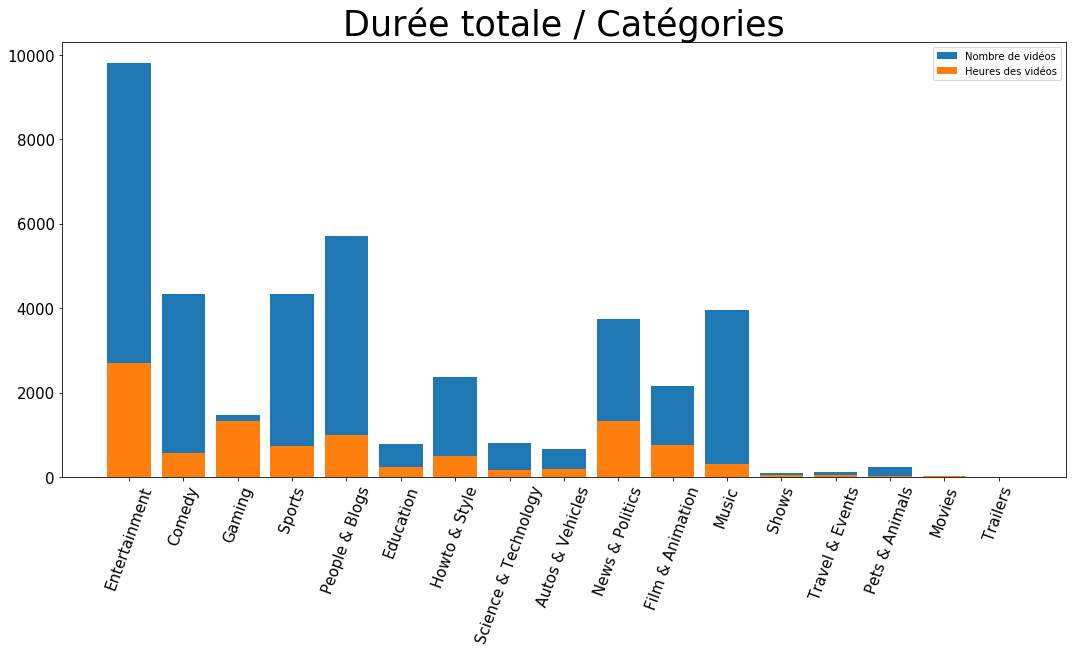

In [168]:
plt.figure(figsize=(18,8))

plt.bar(dico_nbvids_cat.keys(), dico_nbvids_cat.values(), label="Nombre de vidéos")
plt.bar(dico_duree_cat.keys(), dico_duree_cat.values(), label="Heures des vidéos")

plt.xticks(rotation=70, size=15)
plt.yticks(size=15)

plt.legend()
plt.title("Durée totale / Catégories", size=35)

plt.show()

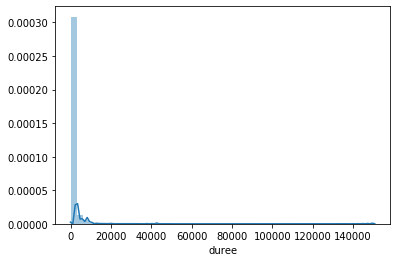

In [70]:
sns.distplot(df_duree["duree"])

### Brouillon

Text(0.5, 1.0, 'Nombres de vidéos par catégories')

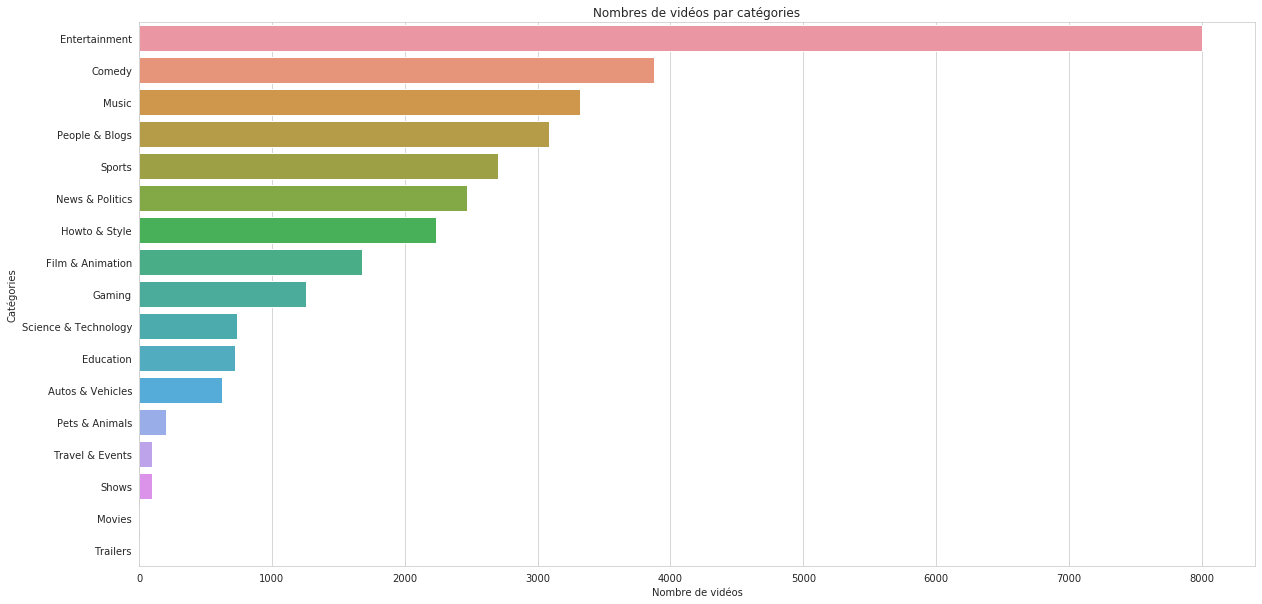

In [206]:
cat_df_fr = df['category'].value_counts().reset_index()
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_fr['index'],x=cat_df_fr['category'], data=cat_df_fr,orient='h')
plt.xlabel("Nombre de vidéos")
plt.ylabel("Catégories")
plt.title("Nombres de vidéos par catégories")

### Temps de vidéos total par catégories

In [207]:
df["duree"].sum()

35756276.0

In [216]:
df[["duree", "category"]].pivot_table(index=df["category"], aggfunc="sum")

,duree
category,
Autos & Vehicles,689129.0
Comedy,2043426.0
Education,851474.0
Entertainment,9714700.0
Film & Animation,2741613.0
Gaming,4757134.0
Howto & Style,1815929.0
Movies,55098.0
Music,1100482.0
